# EDA


- Jose Abal Caamaño
- Jesús Platero Acevedo

## Objective of the case

To realize an exploratory data analysis of dataset ticdata. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#Read the datasets and create our data frames
df_ticdata = pd.read_csv("/Users/joseabalcaamano/Desktop/MachineLearning/PracticaEDA/data/raw/ticdata2000.txt", sep = "\t", header = None)
df_ticeval = pd.read_csv("/Users/joseabalcaamano/Desktop/MachineLearning/PracticaEDA/data/raw/ticeval2000.txt", sep = "\t", header = None)
df_tictgts = pd.read_csv("/Users/joseabalcaamano/Desktop/MachineLearning/PracticaEDA/data/raw/tictgts2000.txt", sep = "\t", header = None)
headers = list(range(1,87))
df_ticdata.columns = headers

headers = list(range(1,87))
df_ticdata.columns = headers

#Add a new column differentiating the data in train and test. For us, our train is ticdata.
df_ticdata['87'] = 1
df_tictgts['87'] = 0

In [3]:
#To know the rows and columns of our dataset.
df_ticdata.shape

(5822, 87)

In [4]:
#Check if they are the same rows.
print(len(df_ticdata), 
      len(df_ticeval), 
      len(df_tictgts))

5822 4000 4000


In [5]:
#There are 86 variables in our dataset ticdata, divided in categoricals and numericals, and the number 86, CARAVAN,
#is our target variable 
list_table = ["MOSTYPE", "MAANTHUI", "MGEMOMV",
                        "MGEMLEEF", "MOSHOOFD", "MGODRK",
                        "MGODPR", "MGODOV", "MGODGE",
                        "MRELGE", "MRELSA", "MRELOV", "MFALLEEN",
                        "MFGEKIND", "MFWEKIND", "MOPLHOOG", "MOPLMIDD",
                        "MOPLLAAG", "MBERHOOG", "MBERZELF",
                        "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO",
                        "MSKA","MSKB1", "MSKB2", "MSKC",
                        "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2",
                        "MAUT0", "MZFONDS", "MZPART", "MINKM30",
                        "MINK3045", "MINK4575", "MINK7512", "MINK123M",
                        "MINKGEM", "MKOOPKLA", "PWAPART", "PWABEDR", "PWALAND",
                        "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT",
                        "PAANHANG", "PTRACTOR", "PWERKT", "PBROM",
                        "PLEVEN", "PPERSONG", "PGEZONG", "PWAOREG",
                        "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS","PINBOED", "PBYSTAND","AWAPART","AWABEDR",
                        "AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR",
                         "AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER",
                         "AFIETS", "AINBOED", "ABYSTAND", "CARAVAN", "TRAIN"]
list_other_var = ['title']
list_tictgts = ["CARAVAN"]
len(list_table)

87

In [6]:
list_tictgts = ["CARAVAN", "TRAIN"]
list_var = ['title']
len(list_tictgts)

2

In [7]:
df_ticdata.columns= list_table
df_tictgts.columns = list_tictgts
df_ticeval.columns = list_table[:-2]
df_ticdata

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  \
0          3       7       0       2         1         2         6         1   
1          4       6       2       2         0         4         5         0   
2          4       3       2       4         4         4         2         0   
3          4       5       2       2         2         3         4         3   
4          4       7       1       2         2         4         4         5   
...      ...     ...     ...     ...       ...       ...       ...       ...   
5817       2       1       2       6         5         3         2         2   
5818       4       6       0       3         2         2         5         0   
5819       3       5       1       4         3         3         4         0   
5820       2       7       2       0         0         4         5         0   
5821       2       7       1       2         1         4         4         1   

      MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  MBERMIDD  MBERARBG  \
0            2         7         1         0         1         2         5   
1            5         4         0         0         0         5         0   
2            5         4         0         0         0         7         0   
3            4         2         4         0         0         3         1   
4            4         0         0         5         4         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5817         5         2         2         0         0         4         1   
5818         0         9         2         1         1         3         3   
5819         1         8         1         0         0         2         3   
5820         2         7         0         2         0         2         4   
5821         2         6         1         0         1         3         2   

      MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  \
0            2     1      1      2     6     1       1       8      8      0   
1            4     0      2      3     5     0       2       7      7      1   
2            2     0      5      0     4     0       7       2      7      0   
3            2     3      2      1     4     0       5       4      9      0   
4            0     9      0      0     0     0       4       5      6      2   
...        ...   ...    ...    ...   ...   ...     ...     ...    ...    ...   
5817         3     2      3      3     3     0       9       0      5      1   
5818         2     0      4      5     0     0       3       6      6      1   
5819         5     1      1      1     4     4       7       2      4      0   
5820         2     0      0      4     5     0       2       7      5      4   
5821         4     1      1      2     6     1       5       4      5      2   

      MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  \
0         1        8       1        0         4         5         0         0   
1         2        6    

In [8]:
print(len(df_ticdata.columns), 
      len(df_ticeval.columns), 
      len(df_tictgts.columns))

87 85 2


In [9]:
#add the column CARAVAN in the other dataset ticeval
df_ticeval = pd.concat([df_ticeval, df_tictgts], axis = 1, join ="inner")

In [10]:
#Reset our index
df_ticdata = df_ticdata.reset_index(col_fill='').drop(['index'], axis=1)
df_ticdata

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  \
0          3       7       0       2         1         2         6         1   
1          4       6       2       2         0         4         5         0   
2          4       3       2       4         4         4         2         0   
3          4       5       2       2         2         3         4         3   
4          4       7       1       2         2         4         4         5   
...      ...     ...     ...     ...       ...       ...       ...       ...   
5817       2       1       2       6         5         3         2         2   
5818       4       6       0       3         2         2         5         0   
5819       3       5       1       4         3         3         4         0   
5820       2       7       2       0         0         4         5         0   
5821       2       7       1       2         1         4         4         1   

      MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  MBERMIDD  MBERARBG  \
0            2         7         1         0         1         2         5   
1            5         4         0         0         0         5         0   
2            5         4         0         0         0         7         0   
3            4         2         4         0         0         3         1   
4            4         0         0         5         4         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5817         5         2         2         0         0         4         1   
5818         0         9         2         1         1         3         3   
5819         1         8         1         0         0         2         3   
5820         2         7         0         2         0         2         4   
5821         2         6         1         0         1         3         2   

      MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  \
0            2     1      1      2     6     1       1       8      8      0   
1            4     0      2      3     5     0       2       7      7      1   
2            2     0      5      0     4     0       7       2      7      0   
3            2     3      2      1     4     0       5       4      9      0   
4            0     9      0      0     0     0       4       5      6      2   
...        ...   ...    ...    ...   ...   ...     ...     ...    ...    ...   
5817         3     2      3      3     3     0       9       0      5      1   
5818         2     0      4      5     0     0       3       6      6      1   
5819         5     1      1      1     4     4       7       2      4      0   
5820         2     0      0      4     5     0       2       7      5      4   
5821         4     1      1      2     6     1       5       4      5      2   

      MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  \
0         1        8       1        0         4         5         0         0   
1         2        6    

In [11]:
#Observ the duplicates of the dataset ticdata
print(df_ticdata.shape, df_ticdata.drop_duplicates().shape)

(5822, 87) (5220, 87)


In [12]:
#Missing values
pd.isnull(df_ticdata[[x for x in df_ticdata.columns[pd.isna(df_ticdata).any()].tolist()]]).sum()

Series([], dtype: float64)

In [13]:
#Look the type of all variables
df_ticdata.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MGODRK': dtype('int64'),
 'MGODPR': dtype('int64'),
 'MGODOV': dtype('int64'),
 'MGODGE': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINK

In [14]:
#We took the target variable, 'CARAVAN', potencial clients who search an insurance of caravans. 
#We look how many people don't have insurance and how many do.
df_data_caravan = df_ticdata['CARAVAN']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_data_caravan_conteo = df_ticdata['CARAVAN'].value_counts().reset_index()
df_data_caravan_pc = pd.merge(df_data_caravan, df_data_caravan_conteo, on=['index'], how='inner')
df_data_caravan_pc

index    percent  CARAVAN
0      0  94.022673     5474
1      1   5.977327      348

In [15]:
#We will create a histogram on the percent of people who have or no insurance of caravans.
fig = px.histogram(df_data_caravan_pc, x="index", y=['percent'])
fig.show()


We can look that the 94.03% don´t have an insurance of caravans, versus a 5,97% that have it.

In [16]:
#Removed the people who have an insurance and we will continue work with that they don´t have it. 
df_ticdata_caravan = df_ticdata[(df_ticdata['CARAVAN']== 0)]
df_ticdata_caravan.shape

(5474, 87)

In [17]:
#Comprobate if in our dataframe exists nulls values
df_data_null_columns = df_ticdata.isnull().sum().sort_values(ascending=False)
df_data_null_rows = df_ticdata.isnull().sum(axis=1).sort_values(ascending=False)
print(df_data_null_columns.shape, df_data_null_rows.shape)

df_null_columnas = pd.DataFrame(df_data_null_columns, columns=['nulls_columns'])     
df_null_filas = pd.DataFrame(df_data_null_rows, columns=['nulls_rows'])  
df_null_columnas['percent_columns'] = df_null_columnas['nulls_columns']/df_ticdata.shape[0]
df_null_filas['percent_rows']= df_null_filas['nulls_rows']/df_ticdata.shape[1]

(87,) (5822,)


In [18]:
#No exists null values. 
df_null_columnas

nulls_columns  percent_columns
MOSTYPE               0              0.0
PPERSONG              0              0.0
PBYSTAND              0              0.0
PINBOED               0              0.0
PFIETS                0              0.0
PPLEZIER              0              0.0
PZEILPL               0              0.0
PBRAND                0              0.0
PWAOREG               0              0.0
PGEZONG               0              0.0
PLEVEN                0              0.0
AWABEDR               0              0.0
PBROM                 0              0.0
PWERKT                0              0.0
PTRACTOR              0              0.0
PAANHANG              0              0.0
PVRAAUT               0              0.0
PMOTSCO               0              0.0
PBESAUT               0              0.0
PPERSAUT              0              0.0
AWAPART               0              0.0
AWALAND               0              0.0
PWABEDR               0              0.0
AGEZONG               0              0.0
CARAVAN               0              0.0
ABYSTAND              0              0.0
AINBOED               0              0.0
AFIETS                0              0.0
APLEZIER              0              0.0
AZEILPL               0              0.0
ABRAND                0              0.0
AWAOREG               0              0.0
APERSONG              0              0.0
APERSAUT              0              0.0
ALEVEN                0              0.0
ABROM                 0              0.0
AWERKT                0              0.0
ATRACTOR              0              0.0
AAANHANG              0              0.0
AVRAAUT               0              0.0
AMOTSCO               0              0.0
ABESAUT               0              0.0
PWALAND               0              0.0
PWAPART               0              0.0
MAANTHUI              0              0.0
MRELOV                0              0.0
MBERZELF              0              0.0
MBERHOOG              0              0.0
MOPLLAAG              0              0.0
MOPLMIDD              0              0.0
MOPLHOOG              0              0.0
MFWEKIND              0              0.0
MFGEKIND              0              0.0
MFALLEEN              0              0.0
MRELSA                0              0.0
MBERMIDD              0              0.0
MRELGE                0              0.0
MGODGE                0              0.0
MGODOV                0              0.0
MGODPR                0              0.0
MGODRK                0              0.0
MOSHOOFD              0              0.0
MGEMLEEF              0              0.0
MGEMOMV               0              0.0
MBERBOER              0              0.0
MBERARBG              0              0.0
MKOOPKLA              0              0.0
MAUT0                 0              0.0
MINKGEM               0              0.0
MINK123M              0              0.0
MINK7512              0              0.0
MINK4575              0              0.0
MINK3045              0              0.0
MINKM30               0              0.0
MZPART                0              0.0
MZFONDS               0              0.0
MAUT2                 0              0.0
MBERARBO              0              0.0
MAUT1                 0              0.0
MHKOOP                0              0.0
MHHUUR                0              0.0
MSKD                  0              0.0
MSKC                  0              0.0
MSKB2                 0              0.0
MSKB1                 0              0.0
MSKA                  0              0.0
TRAIN                 0              0.0

## Transform categorical variables into numerical  

In [19]:
#The column 'MGEMLEEF' is a categorical variable who represents the age, we convert it into a numerical variable
#set the mean value of the values.

df_ticdata.loc[df_ticdata['MGEMLEEF'] == 1,'MGEMLEEF']=25
df_ticdata.loc[df_ticdata['MGEMLEEF'] == 2,'MGEMLEEF']=35
df_ticdata.loc[df_ticdata['MGEMLEEF'] == 3,'MGEMLEEF']=45
df_ticdata.loc[df_ticdata['MGEMLEEF'] == 4,'MGEMLEEF']=55
df_ticdata.loc[df_ticdata['MGEMLEEF'] == 5,'MGEMLEEF']=65
df_ticdata.loc[df_ticdata['MGEMLEEF'] == 6,'MGEMLEEF']=75
[df_ticdata['MGEMLEEF']]

[0       35
 1       35
 2       35
 3       45
 4       35
         ..
 5817    35
 5818    55
 5819    55
 5820    35
 5821    45
 Name: MGEMLEEF, Length: 5822, dtype: int64]

Dataframe with only numerical variables

In [20]:
#We compare our target variable in the train and test. 

#train
plot_df_ticdata = df_ticdata['CARAVAN']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

plot_df_ticdata_conteo = df_ticdata['CARAVAN'].value_counts().reset_index()
plot_df_ticdata_pc = pd.merge(plot_df_ticdata, plot_df_ticdata_conteo, on=['index'], how='inner')


#test
plot_df_ticeval = df_ticeval['CARAVAN']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

plot_df_ticeval_conteo = df_ticeval['CARAVAN'].value_counts().reset_index()
plot_df_ticeval_pc = pd.merge(plot_df_ticeval, plot_df_ticeval_conteo, on=['index'], how='inner')


print(plot_df_ticdata_pc)
print(plot_df_ticeval_pc)

   index    percent  CARAVAN
0      0  94.022673     5474
1      1   5.977327      348
   index  percent  CARAVAN
0      0    94.05     3762
1      1     5.95      238


In [21]:
#We will create two histograms of train and test.
fig_train = px.histogram(plot_df_ticdata_pc, x="index", y=['percent'])
fig_train.show()
fig_test = px.histogram(plot_df_ticeval_pc, x="index", y=['percent'])
fig_test.show()

In [22]:
#We create a data frame with the categorical variables.
df_ticdata_categorical_variables = df_ticdata [["MOSTYPE", "MOSHOOFD", "MGODRK",
                        "MGODPR", "MGODOV", "MGODGE",
                        "MRELGE", "MRELSA", "MRELOV", "MFALLEEN",
                        "MFGEKIND", "MFWEKIND", "MOPLHOOG", "MOPLMIDD",
                        "MOPLLAAG", "MBERHOOG", "MBERZELF",
                        "MBERBOER", "MBERMIDD", "MBERARBG", "MBERARBO",
                        "MSKA","MSKB1", "MSKB2", "MSKC",
                        "MSKD", "MHHUUR", "MHKOOP", "MAUT1", "MAUT2",
                        "MAUT0", "MZFONDS", "MZPART", "MINKM30",
                        "MINK3045", "MINK4575", "MINK7512", "MINK123M",
                        "MINKGEM", "MKOOPKLA", "PWAPART", "PWABEDR", "PWALAND",
                        "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT",
                        "PAANHANG", "PTRACTOR", "PWERKT", "PBROM",
                        "PLEVEN", "PPERSONG", "PGEZONG", "PWAOREG",
                        "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS","PINBOED", "PBYSTAND","CARAVAN"]]

df_ticdata_categorical_variables.head()

MOSTYPE  MOSHOOFD  MGODRK  MGODPR  MGODOV  MGODGE  MRELGE  MRELSA  MRELOV  \
0       33         8       0       5       1       3       7       0       2   
1       37         8       1       4       1       4       6       2       2   
2       37         8       0       4       2       4       3       2       4   
3        9         3       2       3       2       4       5       2       2   
4       40        10       1       4       1       4       7       1       2   

   MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  MOPLMIDD  MOPLLAAG  MBERHOOG  \
0         1         2         6         1         2         7         1   
1         0         4         5         0         5         4         0   
2         4         4         2         0         5         4         0   
3         2         3         4         3         4         2         4   
4         2         4         4         5         4         0         0   

   MBERZELF  MBERBOER  MBERMIDD  MBERARBG  MBERARBO  MSKA  MSKB1  MSKB2  MSKC  \
0         0         1         2         5         2     1      1      2     6   
1         0         0         5         0         4     0      2      3     5   
2         0         0         7         0         2     0      5      0     4   
3         0         0         3         1         2     3      2      1     4   
4         5         4         0         0         0     9      0      0     0   

   MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  MAUT0  MZFONDS  MZPART  MINKM30  \
0     1       1       8      8      0      1        8       1        0   
1     0       2       7      7      1      2        6       3        2   
2     0       7       2      7      0      2        9       0        4   
3     0       5       4      9      0      0        7       2        1   
4     0       4       5      6      2      1        5       4        0   

   MINK3045  MINK4575  MINK7512  MINK123M  MINKGEM  MKOOPKLA  PWAPART  \
0         4         5         0         0        4         3        0   
1         0         5         2         0        5         4        2   
2         5         0         0         0        3         4        2   
3         5         3         0         0        4         4        0   
4         0         9         0         0        6         3        0   

   PWABEDR  PWALAND  PPERSAUT  PBESAUT  PMOTSCO  PVRAAUT  PAANHANG  PTRACTOR  \
0        0        0         6        0        0        0         0         0   
1        0        0         0        0        0        0         0         0   
2        0        0         6        0        0        0         0         0   
3        0        0         6        0        0        0         0         0   
4        0        0         0        0        0        0         0         0   

   PWERKT  PBROM  PLEVEN  PPERSONG  PGEZONG  PWAOREG  PBRAND  PZEILPL  \
0       0      0       0         0        0        0       5        0   
1       0      0       0         0        0        0       2        0   
2       0      0       0         0        0        0       2        0   
3       0      0       0         0        0        0       2        0   
4       0      0       0         0        0        0       6        0   

   PPLEZIER  PFIETS  PINBOED  PBYSTAND  CARAVAN  
0         0       0        0         0        0  
1         0       0        0         0        0  
2         0       0        0         0        0  
3         0       0        0         0        0  
4         0       0        0         0        0

In [23]:
#We create a data frame with the numerical variables.
df_ticdata_numerical_variables = df_ticdata[["MAANTHUI", "MGEMOMV", "MGEMLEEF","AWAPART","AWABEDR", "AWALAND","APERSAUT","ABESAUT","AMOTSCO",
                            "AVRAAUT","AAANHANG","ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG",
                            "AWAOREG","ABRAND","AZEILPL","APLEZIER", "AFIETS", "AINBOED", "ABYSTAND", "CARAVAN"]]
df_ticdata_numerical_variables.head()

MAANTHUI  MGEMOMV  MGEMLEEF  AWAPART  AWABEDR  AWALAND  APERSAUT  ABESAUT  \
0         1        3        35        0        0        0         1        0   
1         1        2        35        2        0        0         0        0   
2         1        2        35        1        0        0         1        0   
3         1        3        45        0        0        0         1        0   
4         1        4        35        0        0        0         0        0   

   AMOTSCO  AVRAAUT  AAANHANG  ATRACTOR  AWERKT  ABROM  ALEVEN  APERSONG  \
0        0        0         0         0       0      0       0         0   
1        0        0         0         0       0      0       0         0   
2        0        0         0         0       0      0       0         0   
3        0        0         0         0       0      0       0         0   
4        0        0         0         0       0      0       0         0   

   AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  AFIETS  AINBOED  ABYSTAND  \
0        0        0       1        0         0       0        0         0   
1        0        0       1        0         0       0        0         0   
2        0        0       1        0         0       0        0         0   
3        0        0       1        0         0       0        0         0   
4        0        0       1        0         0       0        0         0   

   CARAVAN  
0        0  
1        0  
2        0  
3        0  
4        0

## Study of our variables in the dataframe TRAIN (ticdata)

In [24]:
def get_corr_matrix(dataset = None , metodo='spearman', size_figure=[10,8]):
    #To obtain the Spearman´s correlation, only change the method

    if dataset is None:
        print(u'\nNeed to add arguments to the function')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()

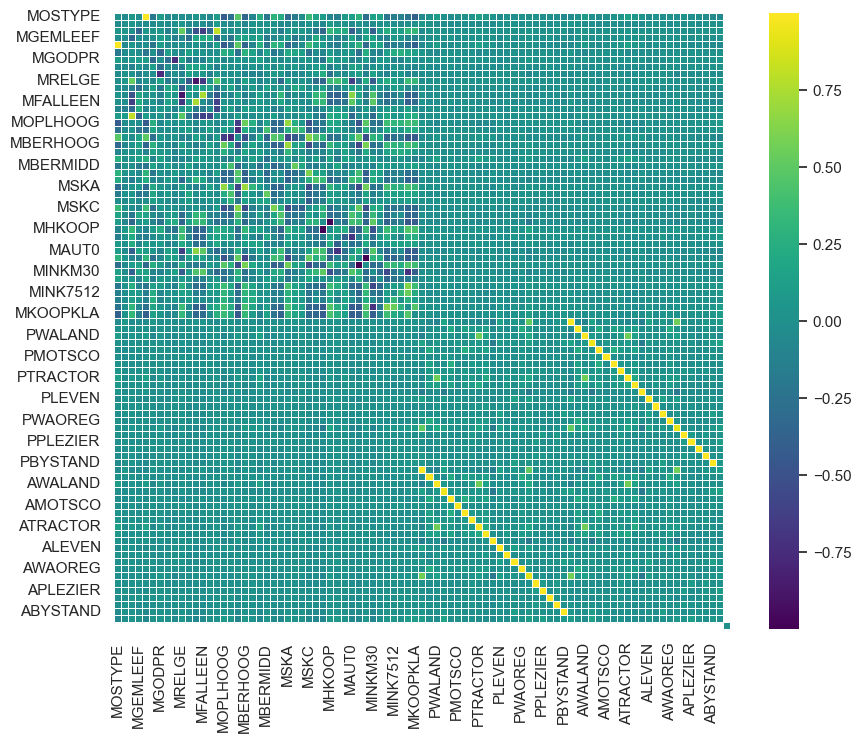

In [25]:
#In the upper left side we have the correlation of the categorical variables and in the lower right side we have
#the correlation  of the policies.
get_corr_matrix(dataset = df_ticdata, size_figure=[10,8])

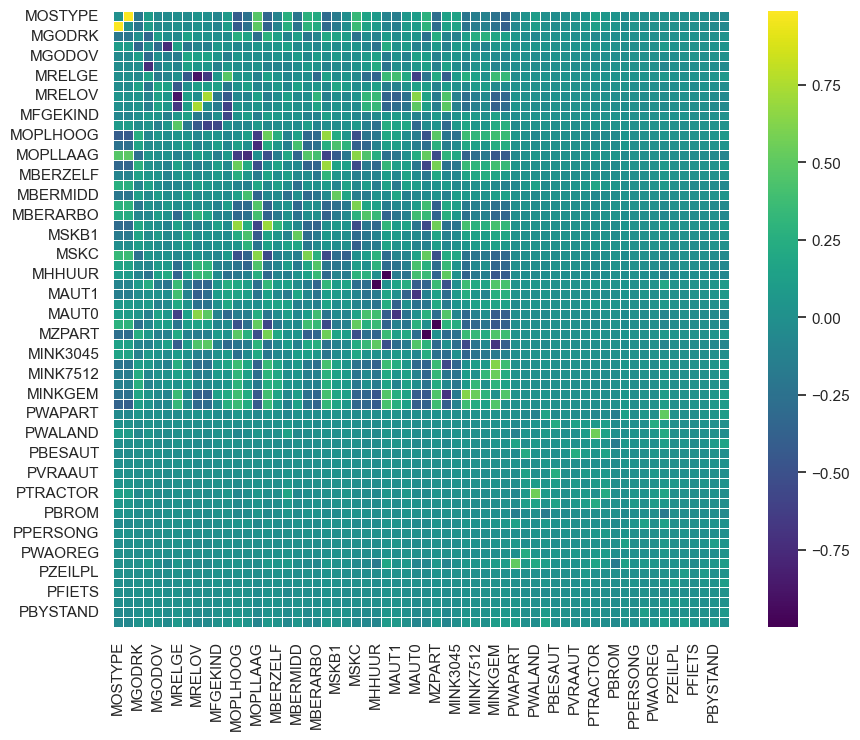

In [26]:
#We do the correlation matrix of the categorical variables.
get_corr_matrix(dataset = df_ticdata_categorical_variables, size_figure=[10,8])

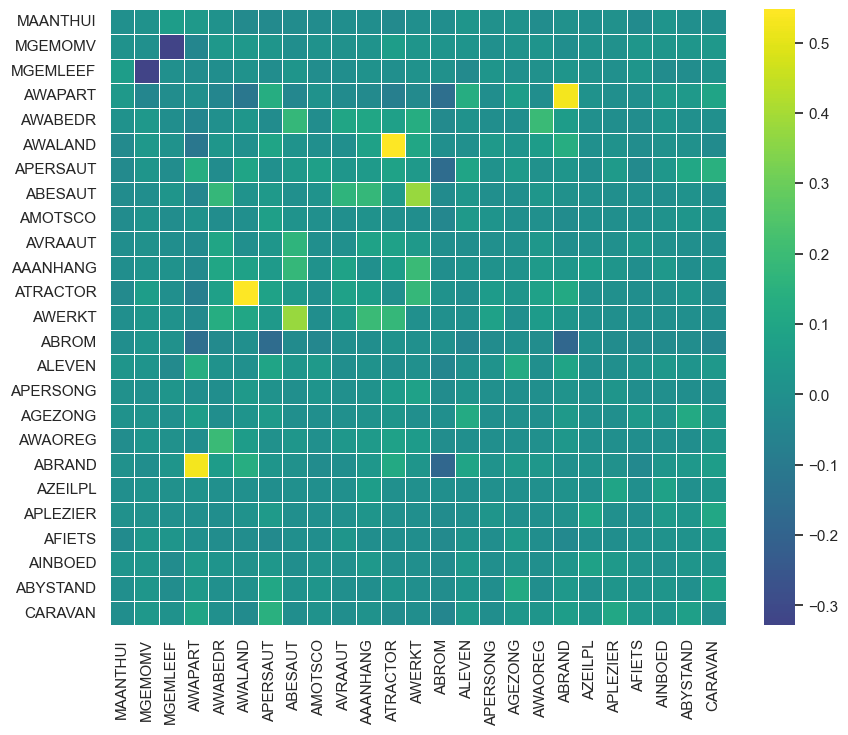

In [27]:
#We do the correlation matrix of the numerical variables. 
get_corr_matrix(dataset = df_ticdata_numerical_variables, 
                metodo='pearson', size_figure=[10,8])

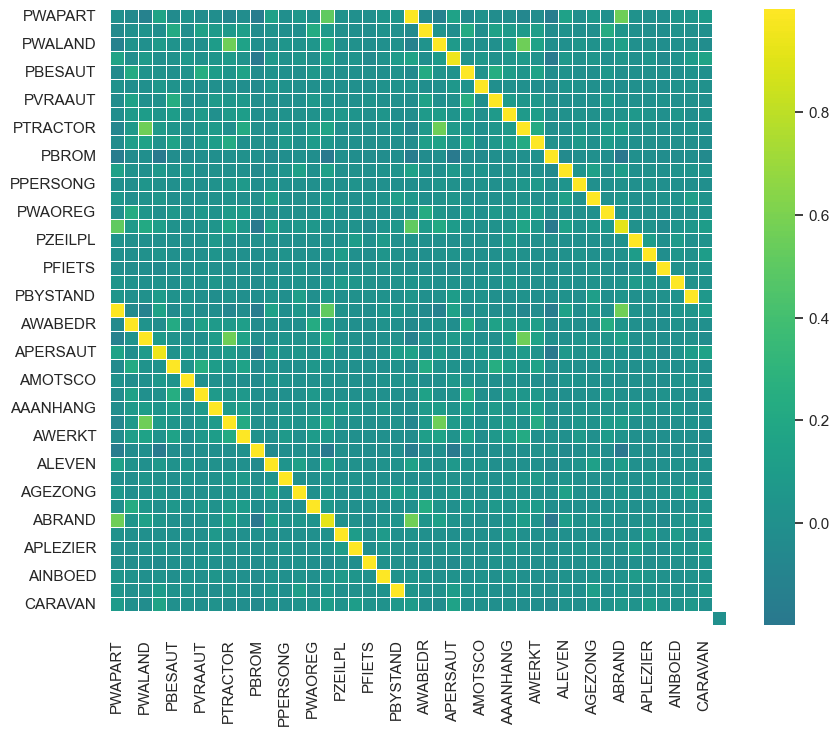

In [28]:
#We create a data frame with the policies.
df_ticdata_policies = df_ticdata[["PWAPART", "PWABEDR", "PWALAND",
                        "PPERSAUT", "PBESAUT", "PMOTSCO", "PVRAAUT",
                        "PAANHANG", "PTRACTOR", "PWERKT", "PBROM",
                        "PLEVEN", "PPERSONG", "PGEZONG", "PWAOREG",
                        "PBRAND", "PZEILPL", "PPLEZIER", "PFIETS","PINBOED", "PBYSTAND","AWAPART","AWABEDR",
                        "AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR",
                         "AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER",
                         "AFIETS", "AINBOED", "ABYSTAND", "CARAVAN", "TRAIN"]]

get_corr_matrix(dataset = df_ticdata_policies, size_figure=[10,8])

In [29]:
df_ticdata_policies.corr(method='spearman').style.background_gradient(cmap='coolwarm')

## Study of categorical variables with Cramer ´s V

In [30]:
def cramers_v(var1,var2):
 
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum()
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))


We use Cramer´s V to observ categorical variables that we considered be highly correlated, based on the descripcion of our dictionary.

In [31]:
cramers_v(df_ticdata_categorical_variables["MOSTYPE"], df_ticdata_categorical_variables["MOSHOOFD"])

0.9974157937677048

In [32]:
#Average income  vs Purchasing power class

cramers_v(df_ticdata_categorical_variables["MINKGEM"], df_ticdata_categorical_variables["MKOOPKLA"])

0.22021007250782393

In [33]:
# High status vs income > 123.000

cramers_v(df_ticdata_categorical_variables["MBERHOOG"], df_ticdata_categorical_variables["MINK123M"])

0.16893247903544156

In [34]:
# High level of education vs income > 123.000

cramers_v(df_ticdata_categorical_variables["MOPLHOOG"], df_ticdata_categorical_variables["MINK123M"])

0.1991300006594408

In [35]:
# social class D vs Unskilled labours

cramers_v(df_ticdata_categorical_variables["MSKD"], df_ticdata_categorical_variables["MBERARBO"])

0.26855759802471696

After comprobate some variables, we understood could be highly correlated, we look what only Customer subtype and Customer main type. For a future model we could rescind one of them.

In [36]:
rows = []

for var1 in df_ticdata_categorical_variables:
    col = []
    for var2 in df_ticdata_categorical_variables:
        cramers = cramers_v(df_ticdata_categorical_variables[var1], df_ticdata_categorical_variables[var2])
        col.append(round(cramers, 2))
    rows.append(col)
    
cramers_results = np.array(rows)
df_vcramer = pd.DataFrame(cramers_results, columns = df_ticdata_categorical_variables.columns, index = df_ticdata_categorical_variables.columns)

df_vcramer

MOSTYPE  MOSHOOFD  MGODRK  MGODPR  MGODOV  MGODGE  MRELGE  MRELSA  \
MOSTYPE      1.00      1.00    0.16    0.19    0.21    0.19    0.28    0.20   
MOSHOOFD     1.00      1.00    0.09    0.11    0.12    0.10    0.21    0.14   
MGODRK       0.16      0.09    1.00    0.22    0.17    0.12    0.10    0.17   
MGODPR       0.19      0.11    0.22    1.00    0.25    0.43    0.14    0.17   
MGODOV       0.21      0.12    0.17    0.25    1.00    0.16    0.18    0.24   
MGODGE       0.19      0.10    0.12    0.43    0.16    1.00    0.14    0.16   
MRELGE       0.28      0.21    0.10    0.14    0.18    0.14    1.00    0.31   
MRELSA       0.20      0.14    0.17    0.17    0.24    0.16    0.31    1.00   
MRELOV       0.29      0.20    0.10    0.13    0.20    0.14    0.61    0.16   
MFALLEEN     0.28      0.20    0.07    0.10    0.14    0.09    0.35    0.13   
MFGEKIND     0.18      0.11    0.07    0.11    0.13    0.12    0.12    0.14   
MFWEKIND     0.27      0.20    0.08    0.11    0.14    0.11    0.25    0.12   
MOPLHOOG     0.29      0.21    0.12    0.11    0.12    0.09    0.12    0.09   
MOPLMIDD     0.22      0.15    0.09    0.11    0.12    0.10    0.12    0.10   
MOPLLAAG     0.30      0.22    0.11    0.11    0.10    0.10    0.14    0.09   
MBERHOOG     0.26      0.18    0.12    0.13    0.15    0.13    0.12    0.12   
MBERZELF     0.30      0.12    0.16    0.14    0.12    0.14    0.10    0.14   
MBERBOER     0.33      0.22    0.06    0.11    0.20    0.10    0.11    0.09   
MBERMIDD     0.21      0.13    0.09    0.13    0.13    0.11    0.11    0.12   
MBERARBG     0.23      0.16    0.09    0.12    0.15    0.11    0.12    0.11   
MBERARBO     0.23      0.17    0.08    0.12    0.13    0.10    0.17    0.12   
MSKA         0.27      0.19    0.10    0.11    0.15    0.10    0.11    0.11   
MSKB1        0.18      0.12    0.09    0.09    0.12    0.08    0.12    0.12   
MSKB2        0.21      0.13    0.08    0.12    0.13    0.10    0.10    0.10   
MSKC         0.25      0.19    0.10    0.11    0.11    0.10    0.11    0.10   
MSKD         0.22      0.15    0.07    0.12    0.13    0.11    0.16    0.11   
MHHUUR       0.29      0.21    0.09    0.14    0.16    0.14    0.20    0.15   
MHKOOP       0.29      0.21    0.09    0.14    0.16    0.14    0.20    0.14   
MAUT1        0.24      0.15    0.13    0.15    0.16    0.12    0.24    0.13   
MAUT2        0.24      0.14    0.14    0.16    0.14    0.11    0.16    0.14   
MAUT0        0.28      0.18    0.12    0.15    0.20    0.13    0.31    0.16   
MZFONDS      0.26      0.19    0.14    0.12    0.16    0.14    0.18    0.17   
MZPART       0.26      0.19    0.14    0.12    0.16    0.14    0.18    0.17   
MINKM30      0.23      0.17    0.10    0.12    0.11    0.12    0.21    0.10   
MINK3045     0.21      0.13    0.08    0.10    0.12    0.09    0.12    0.09   
MINK4575     0.25      0.18    0.08    0.11    0.15    0.11    0.15    0.11   
MINK7512     0.16      0.10    0.14    0.08    0.08    0.04    0.10    0.09   
MINK123M     0.14      0.08    0.13    0.08    0.09    0.09    0.07    0.07   
MINKGEM      0.26      0.20    0.13    0.12    0.10    0.11    0.19    0.08   
MKOOPKLA     0.95      0.61    0.10    0.10    0.09    0.09    0.17    0.08   
PWAPART      0.09      0.07    0.02    0.00    0.02    0.00    0.04    0.00   
PWABEDR      0.02      0.02    0.00    0.00    0.00    0.00    0.00    0.00   
PWALAND      0.10      0.11    0.01    0.04    0.02    0.03    0.02    0.00   
PPERSAUT     0.04      0.05    0.00    0.06    0.01    0.01    0.02    0.00   
PBESAUT      0.05      0.00    0.00    0.00    0.00    0.00    0.00    0.00   
PMOTSCO      0.05      0.03    0.00    0.00    0.00    0.00    0.03    0.00   
PVRAAUT      0.00      0.01    0.00    0.00    0.00    0.00    0.00    0.00   
PAANHANG     0.07      0.04    0.00    0.00    0.00    0.00    0.00    0.00   
PTRACTOR     0.12      0.13    0.00    0.02    0.04    0.01    0.02    0.00   
PWERKT       0.08      0.07    0.00    0.03    0.02    0.00 

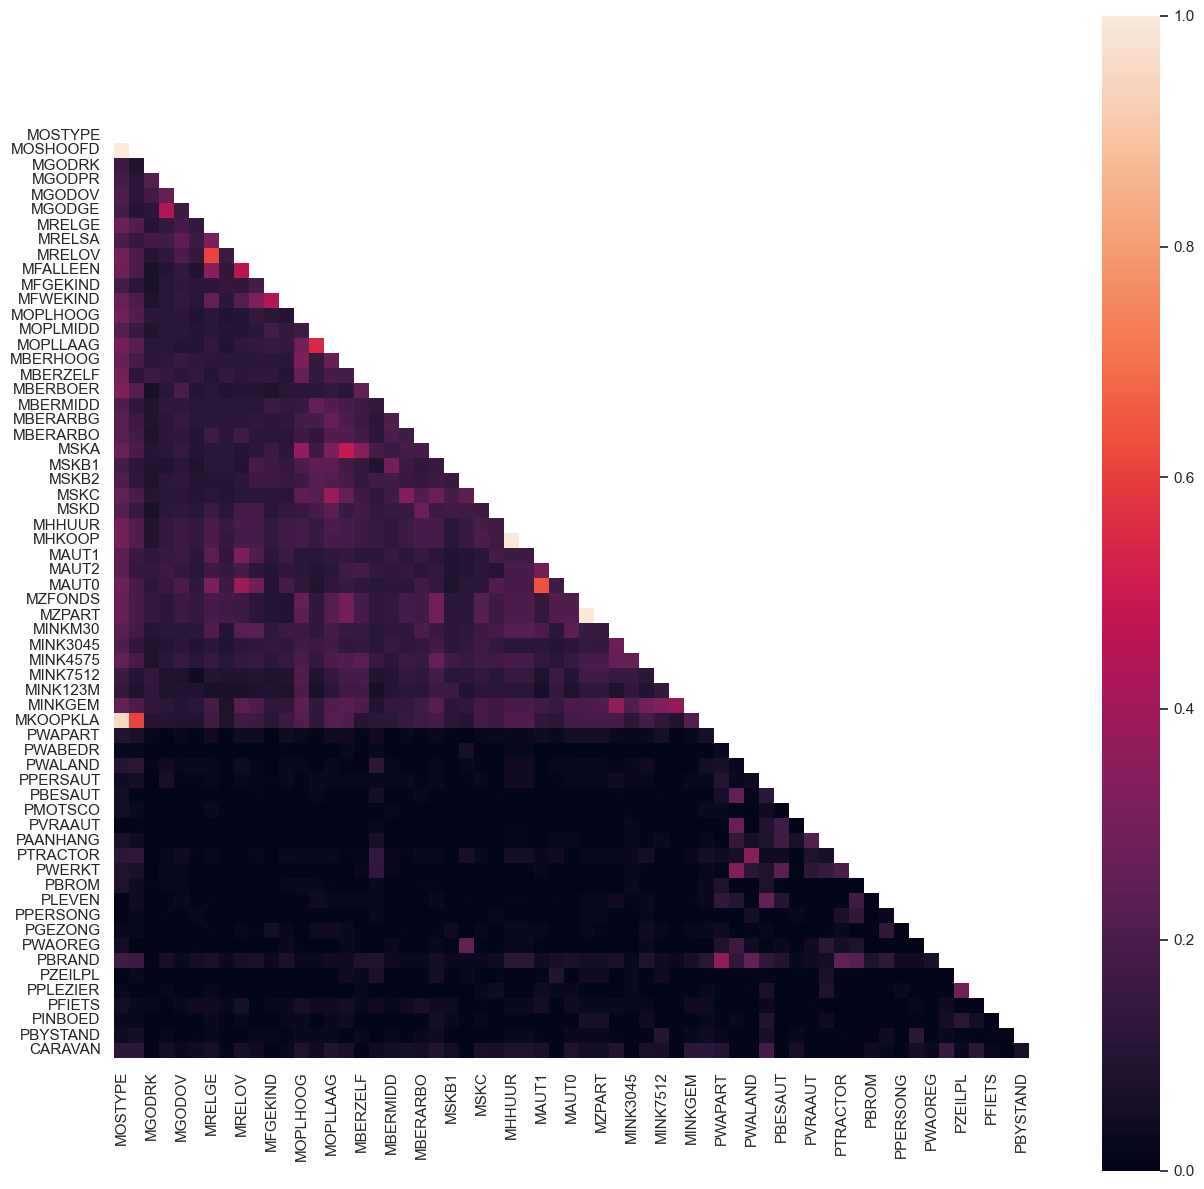

In [37]:
#Heatmap of correlation matrix 
mask = np.zeros_like(df_vcramer, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, axx = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df_vcramer, mask = mask, vmin = 0, vmax = 1, square = True, ax = axx)
    
plt.show()

## Study of the histograms of the variables VS target variable ('CARAVAN')

In [38]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Number of nulls: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

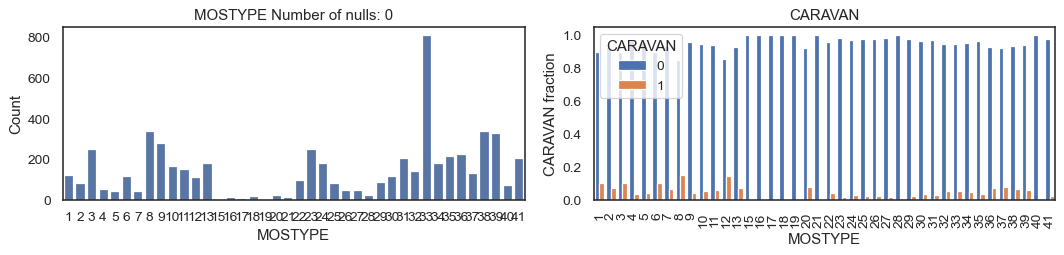

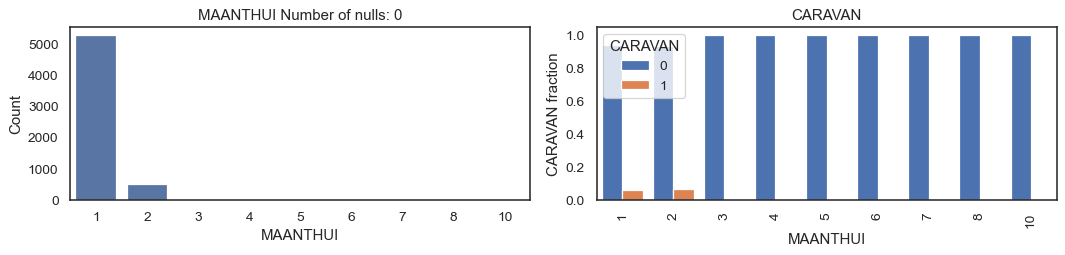

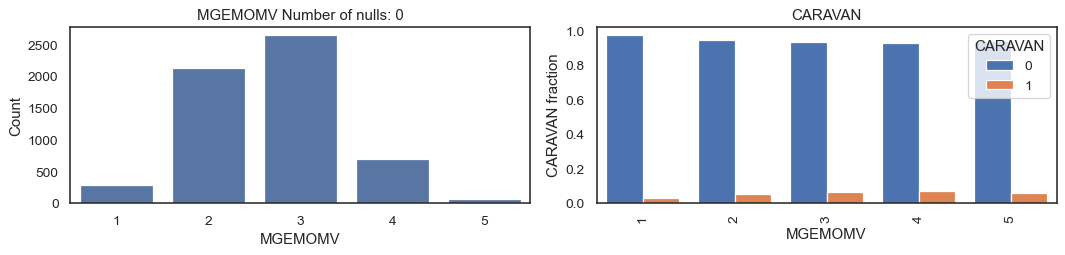

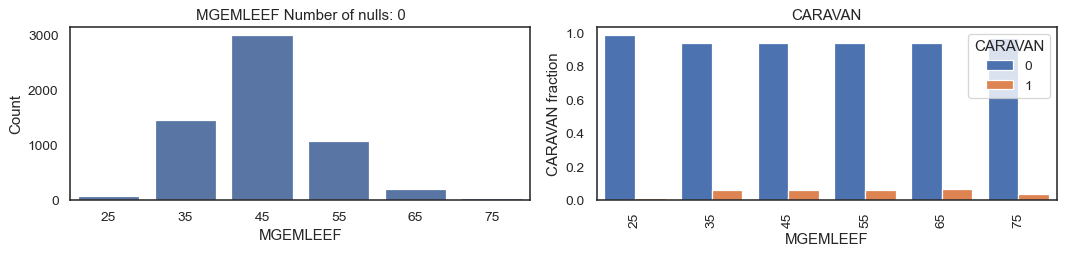

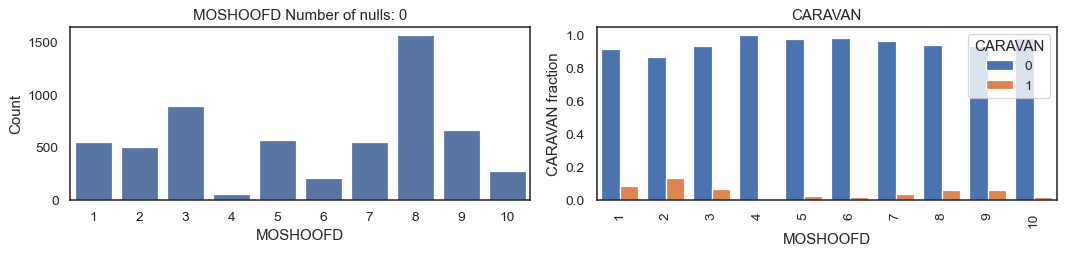

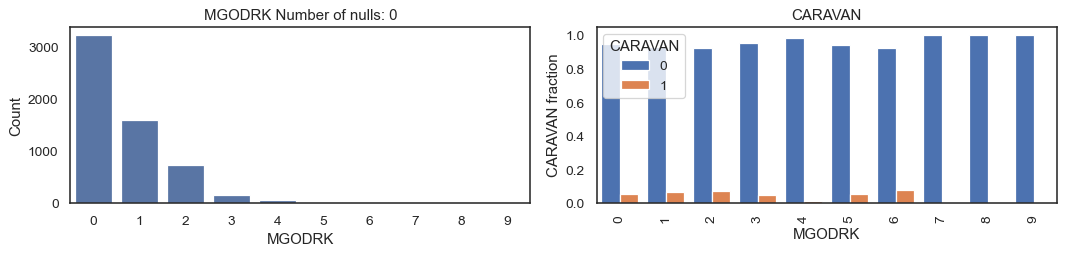

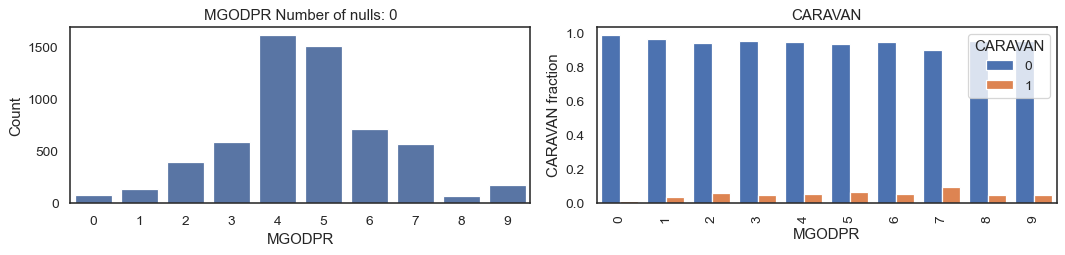

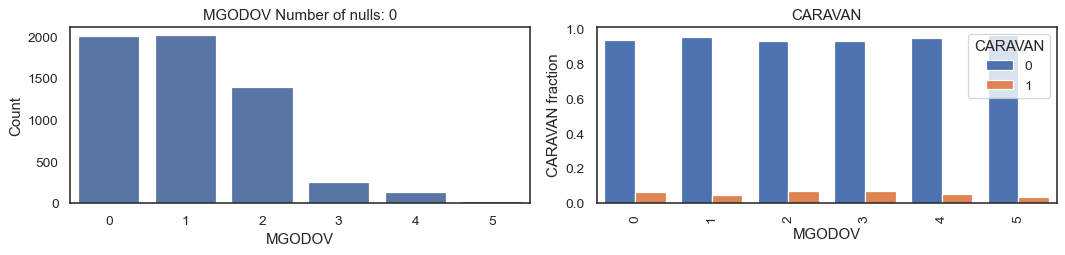

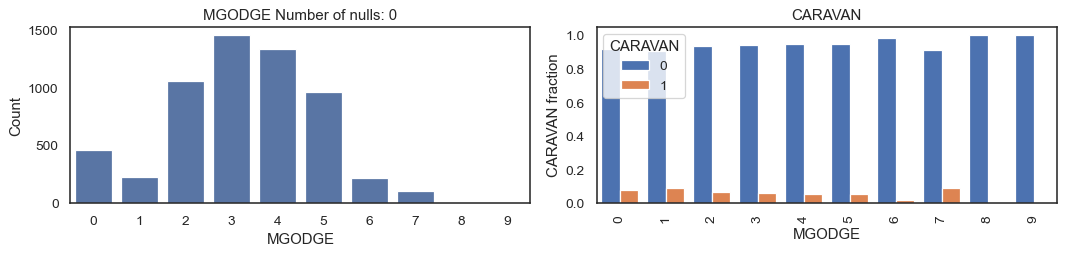

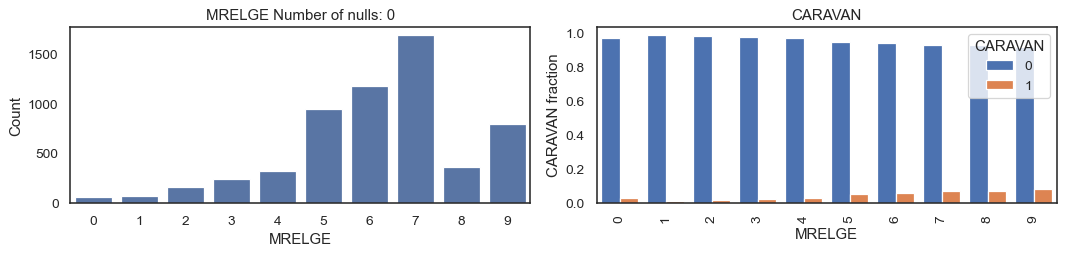

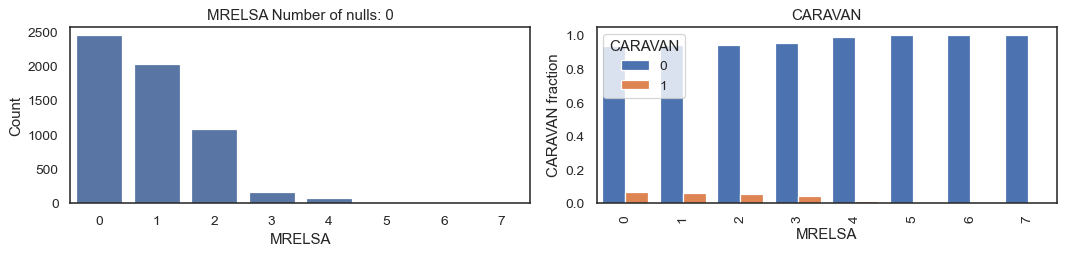

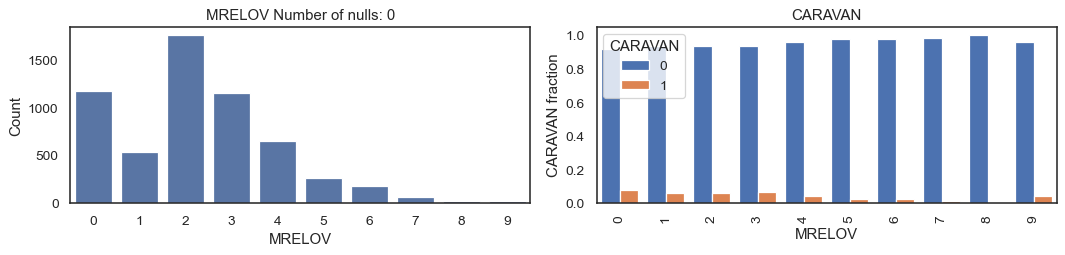

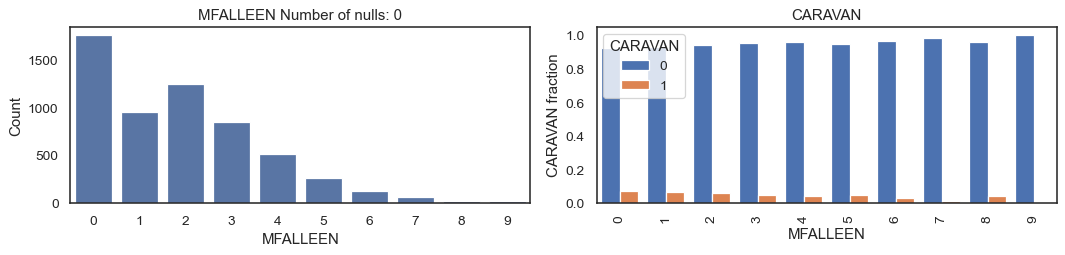

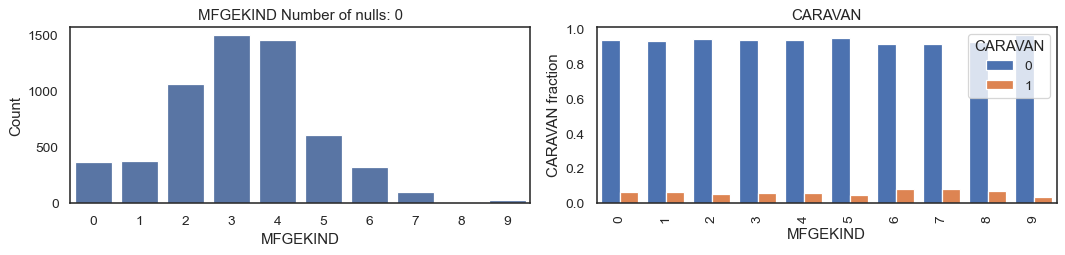

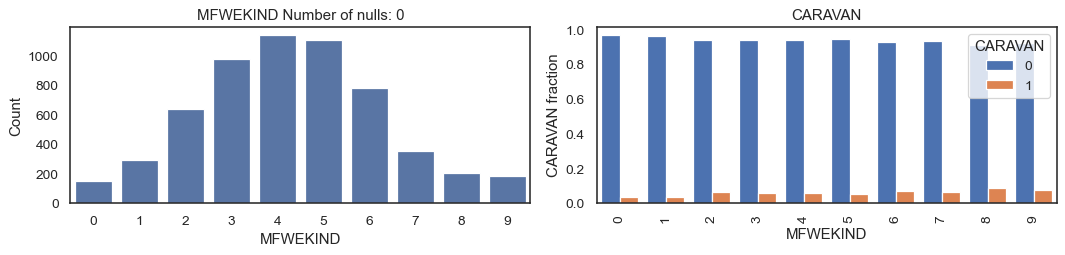

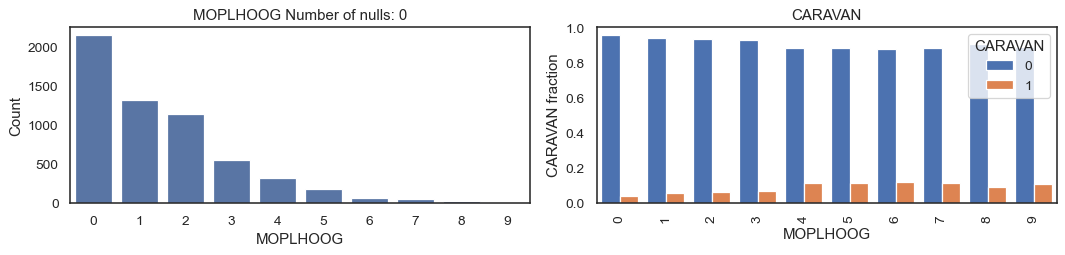

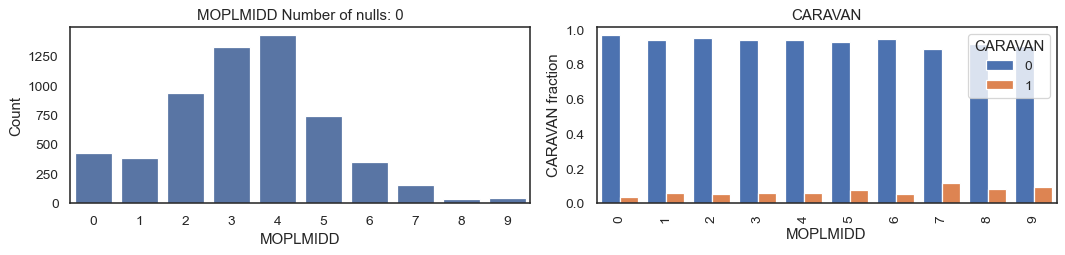

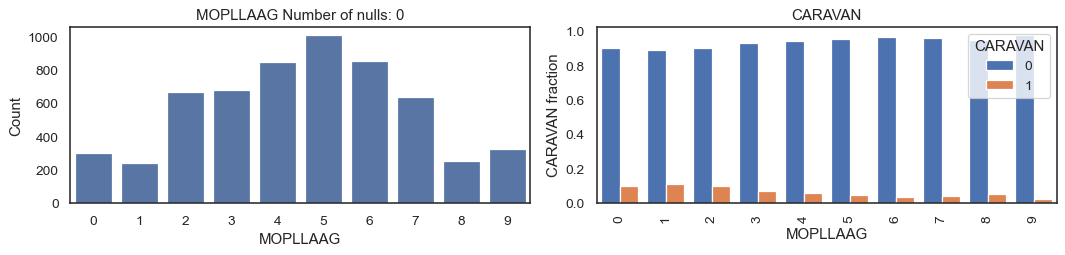

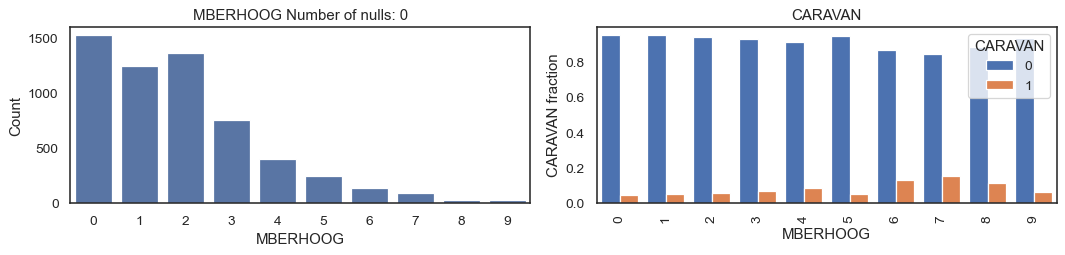

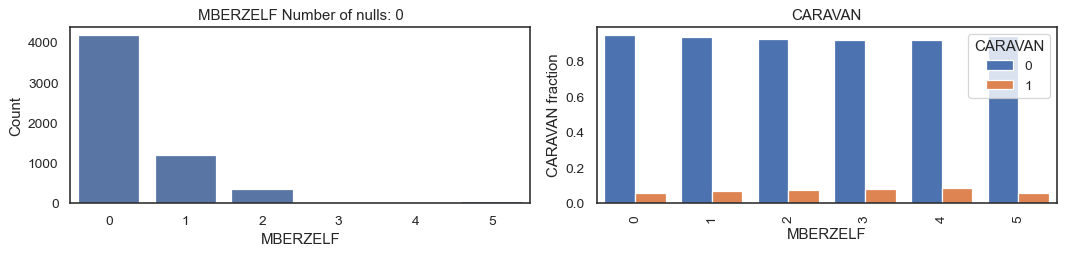

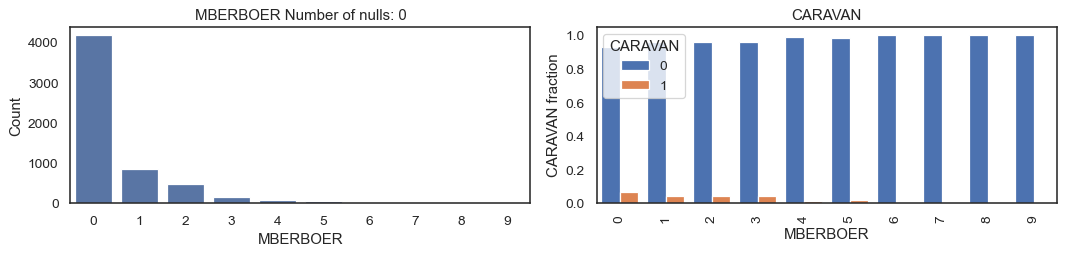

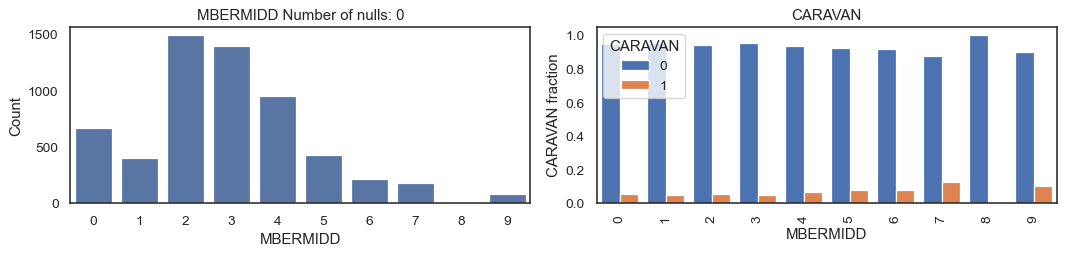

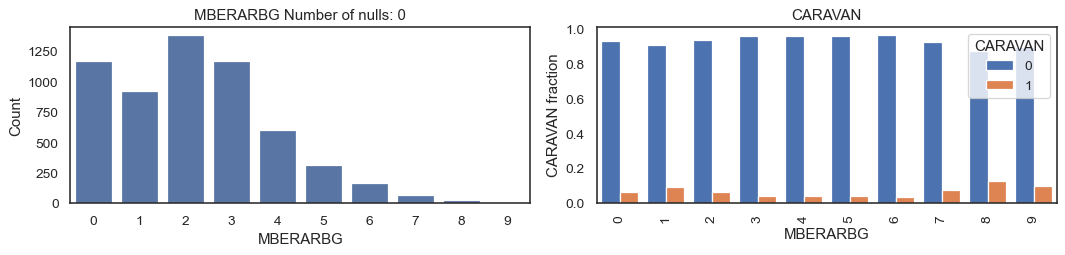

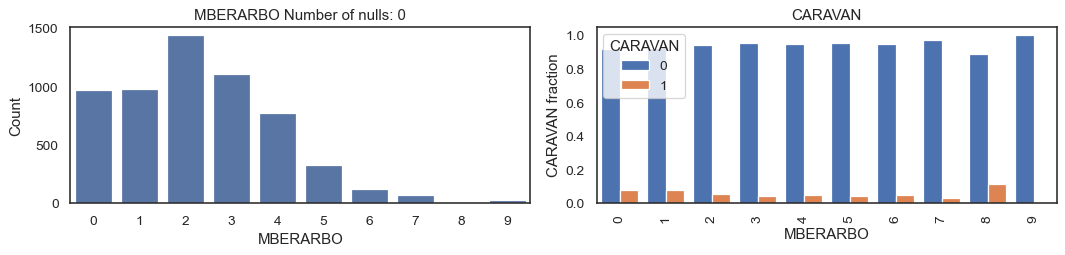

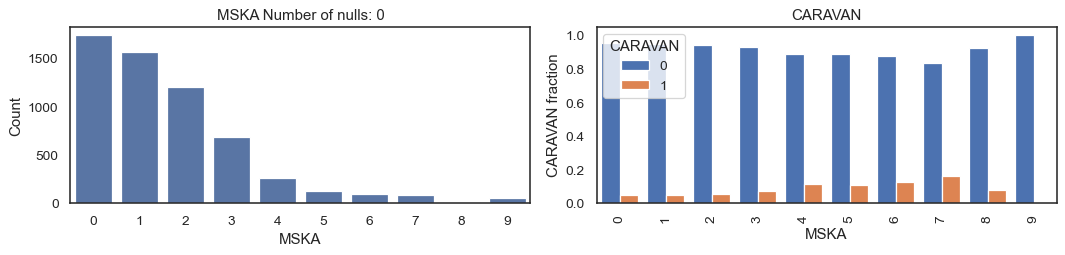

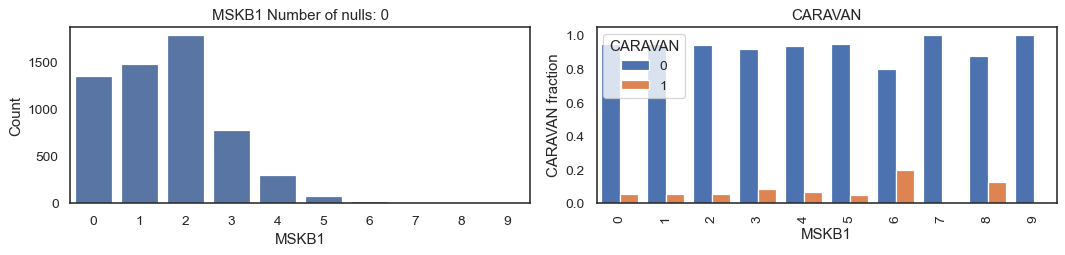

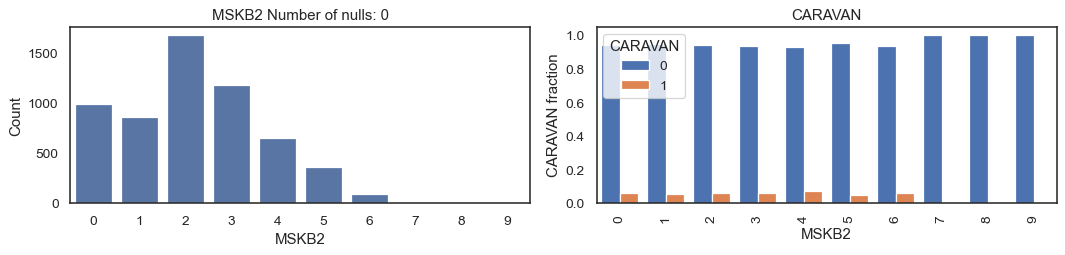

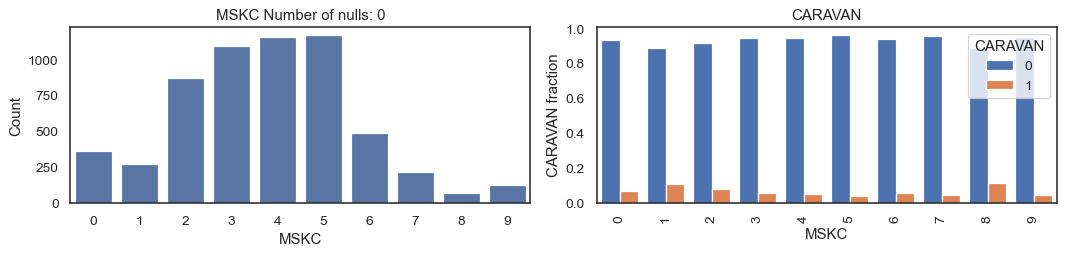

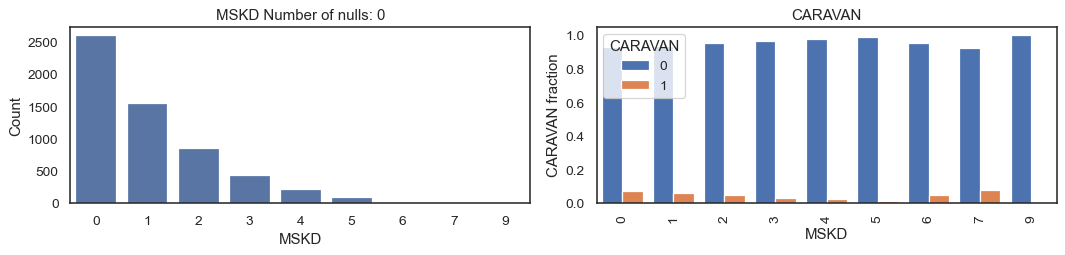

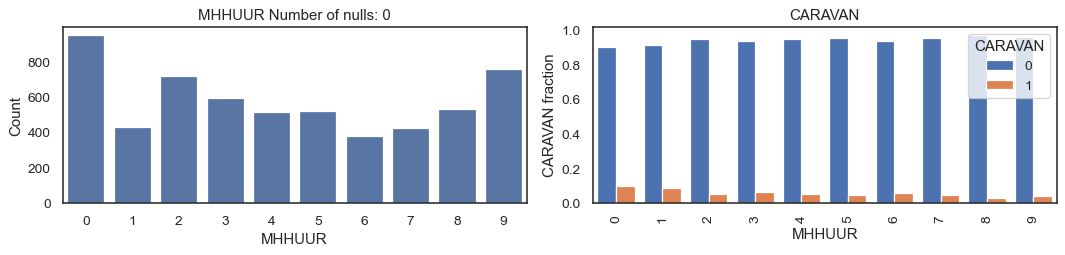

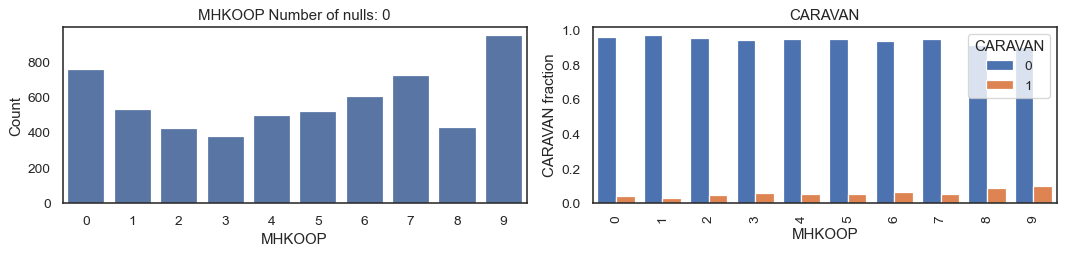

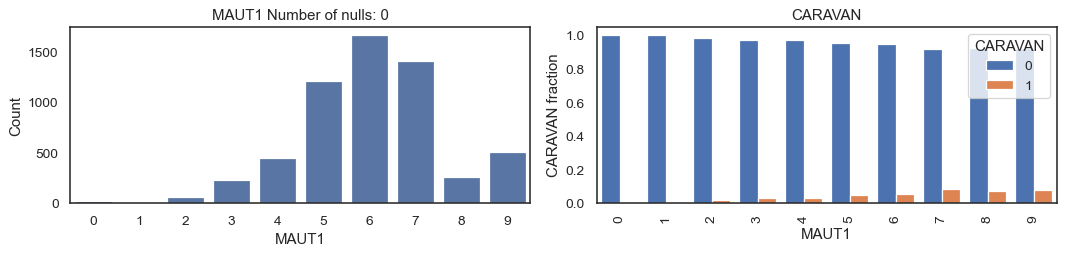

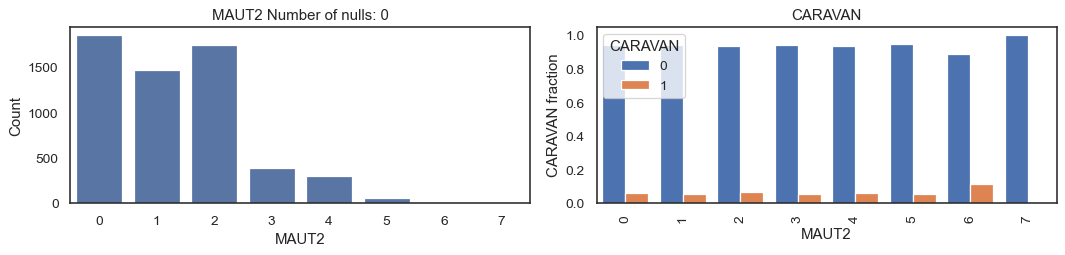

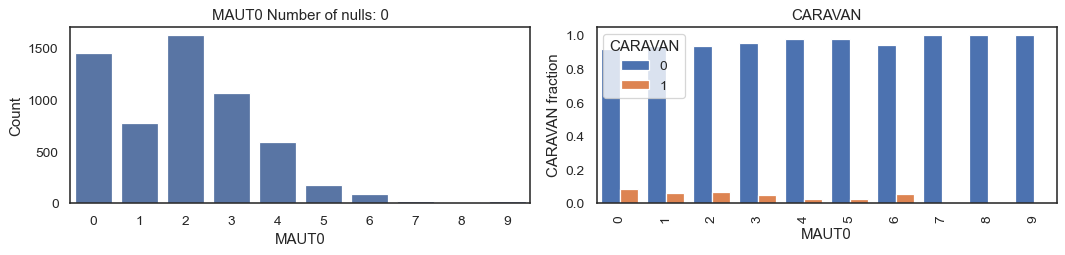

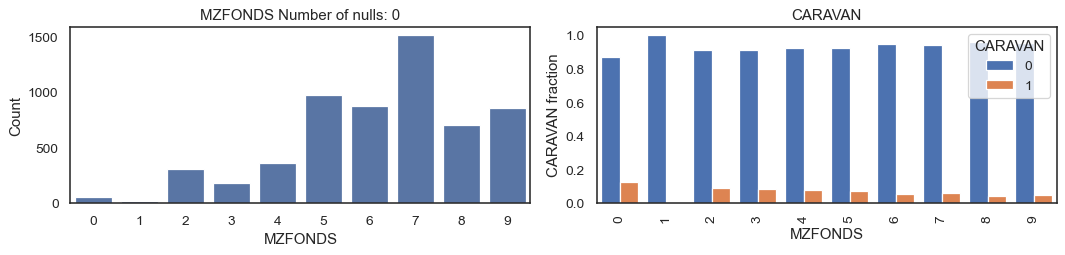

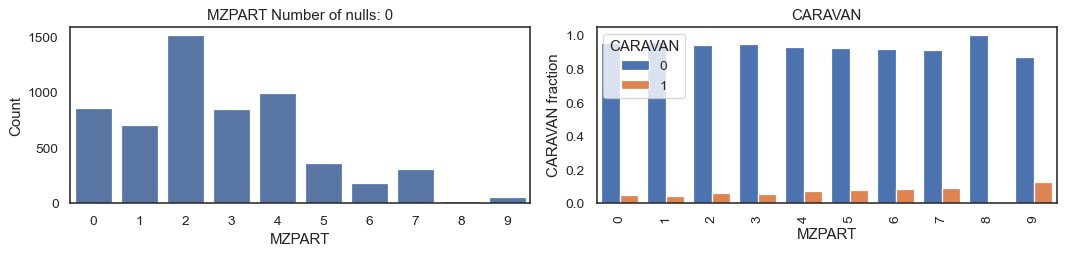

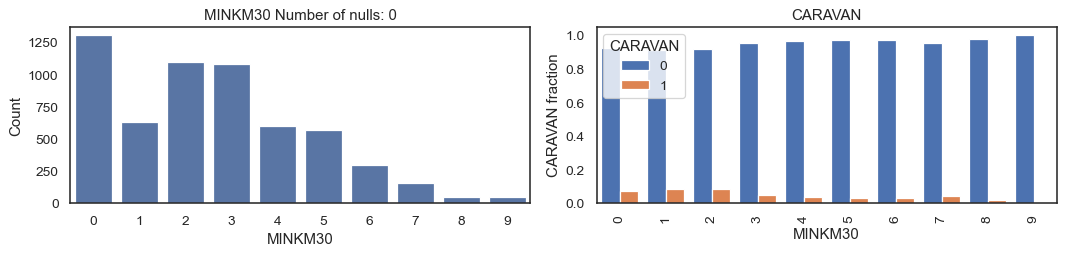

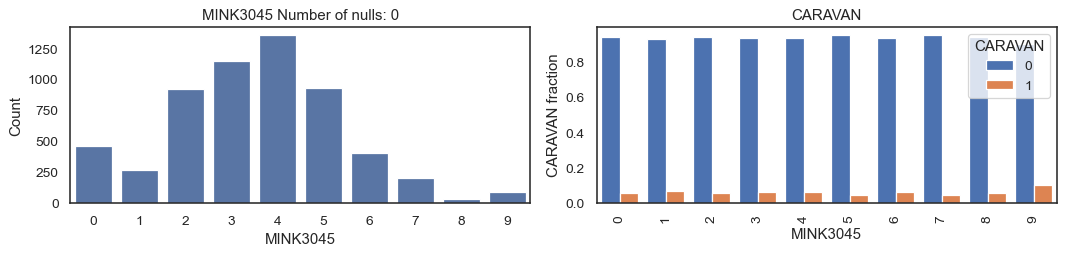

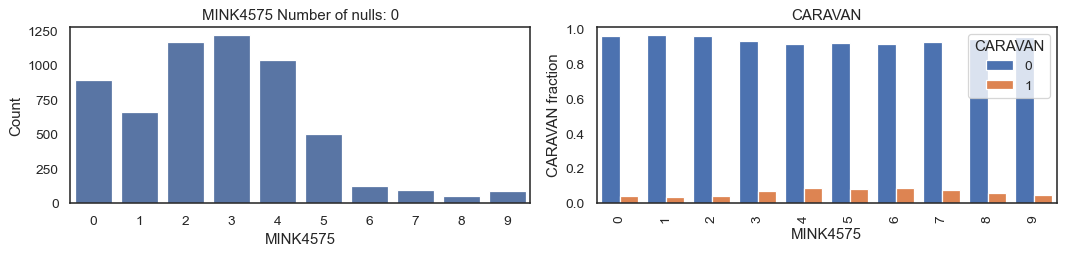

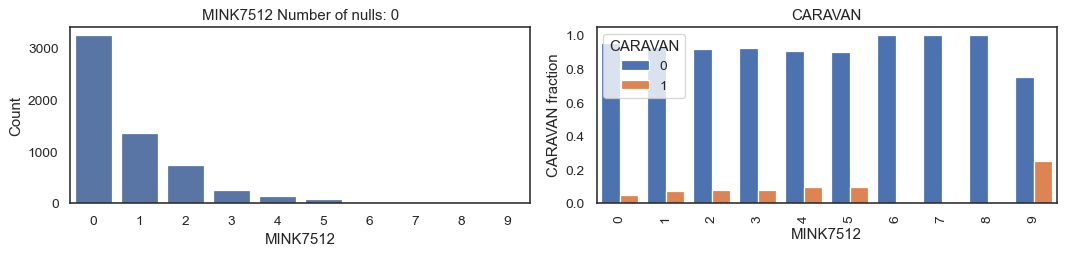

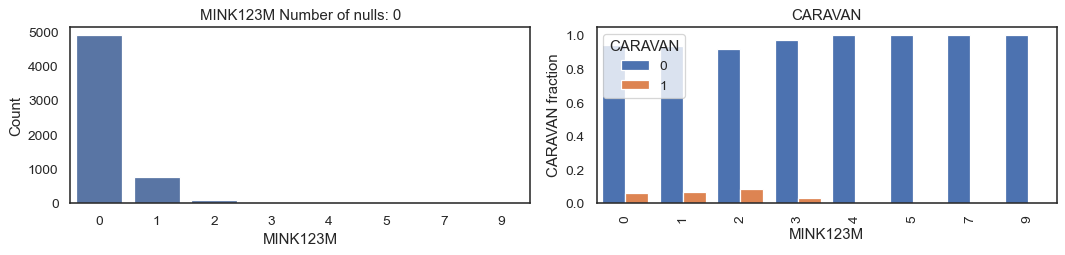

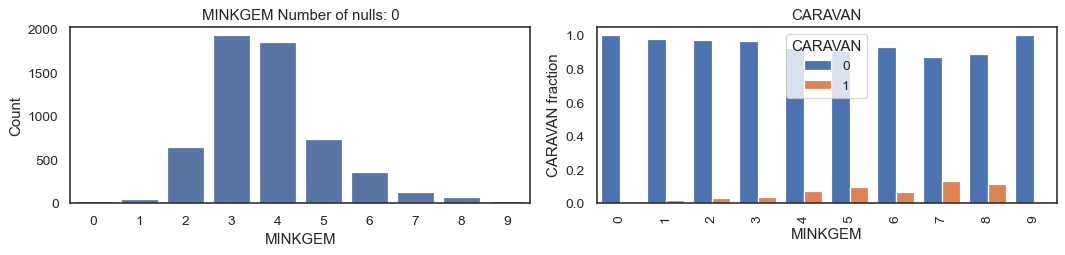

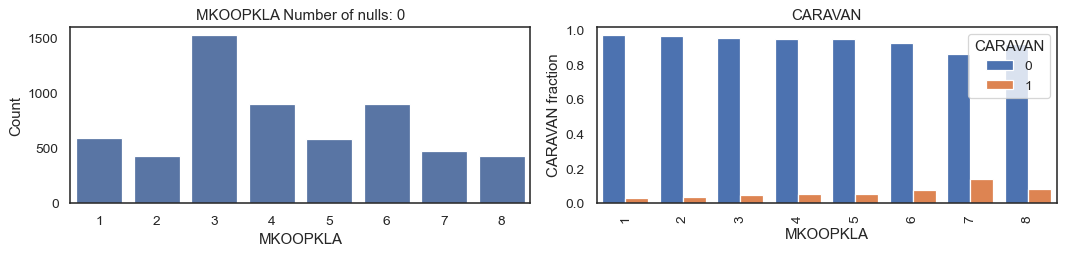

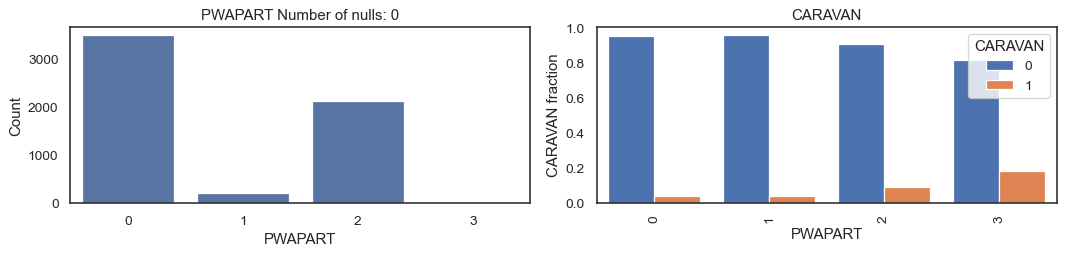

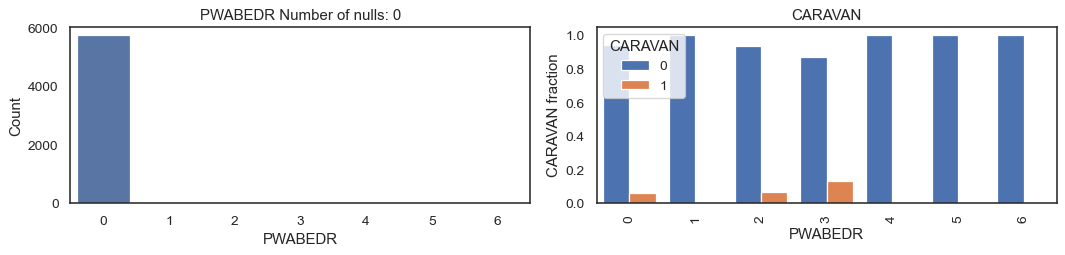

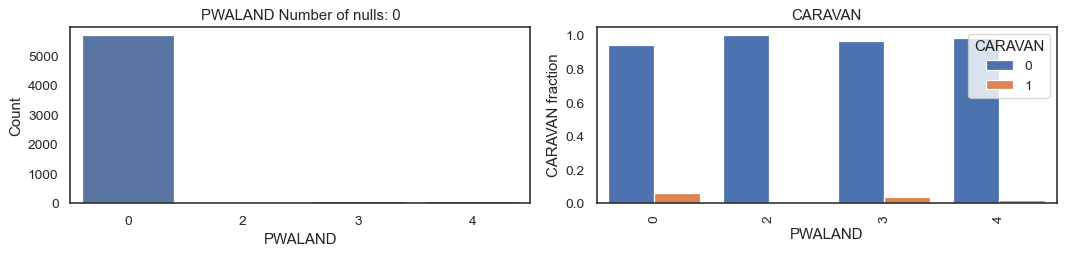

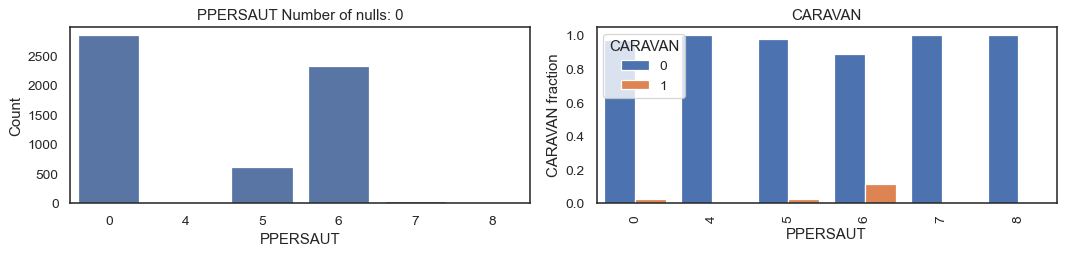

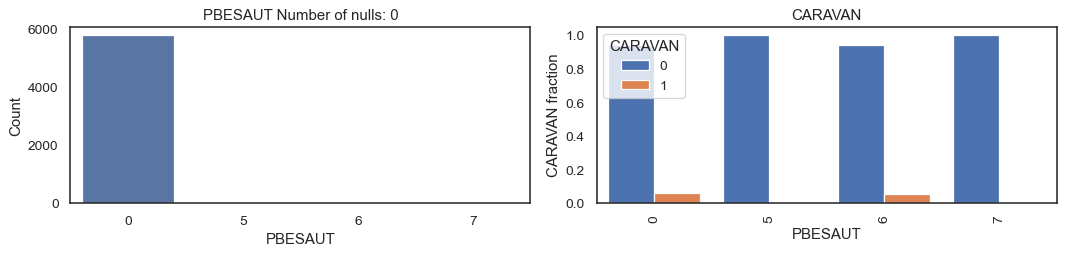

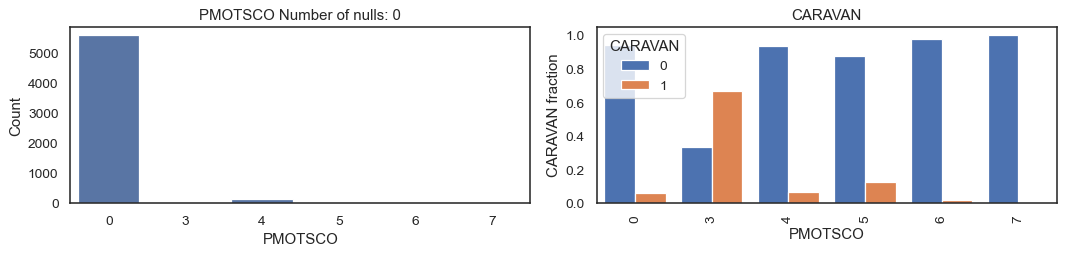

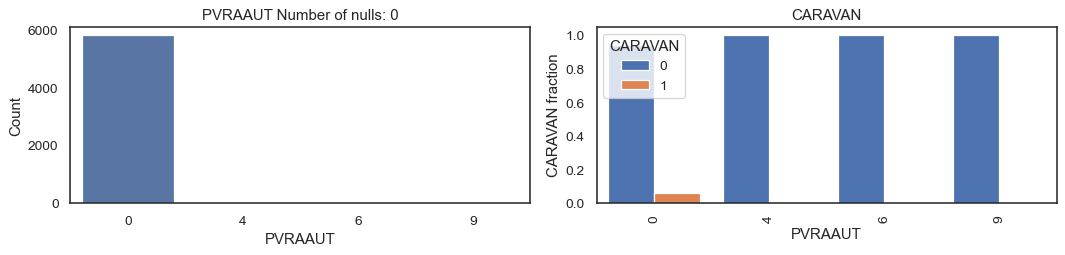

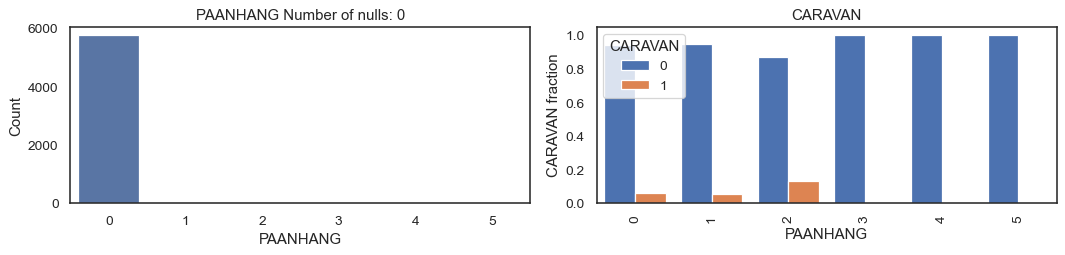

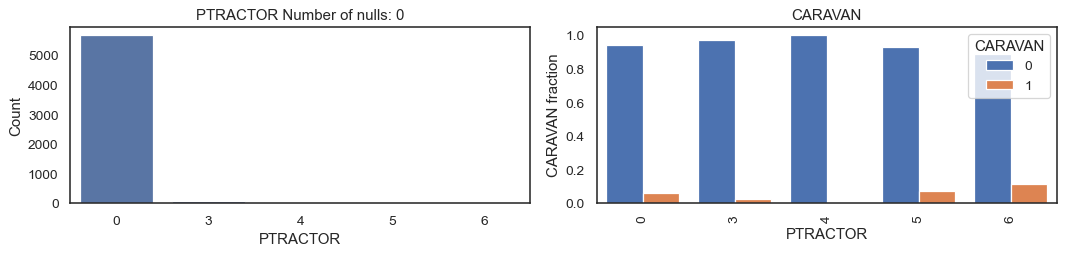

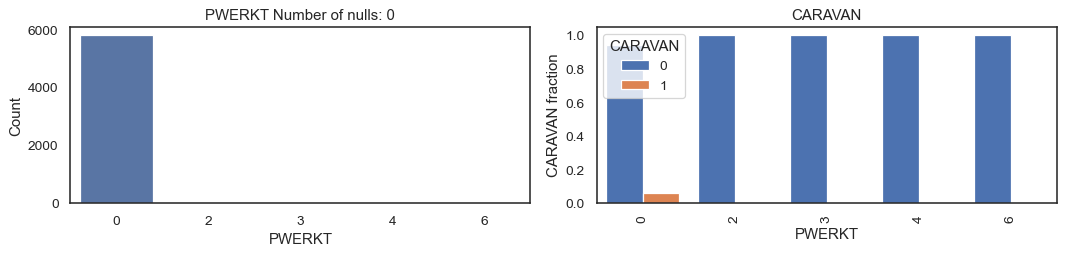

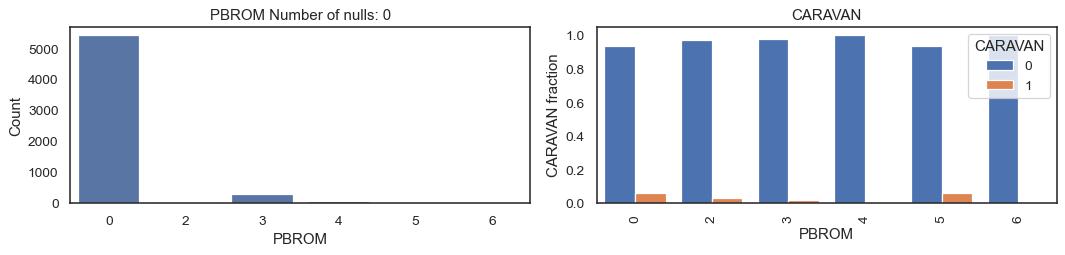

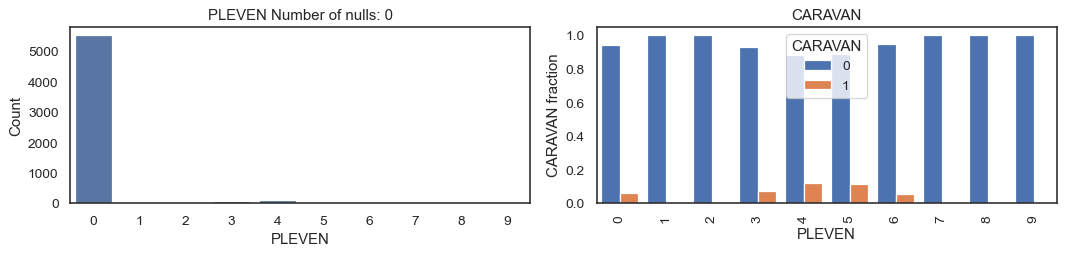

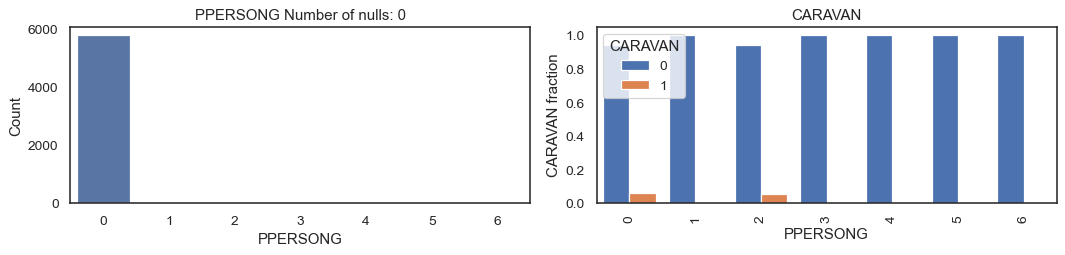

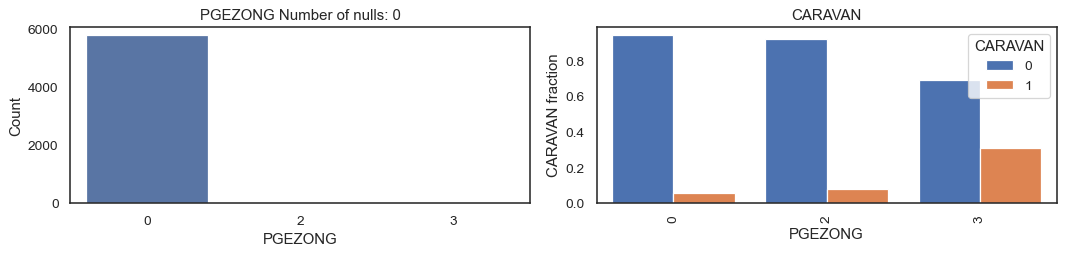

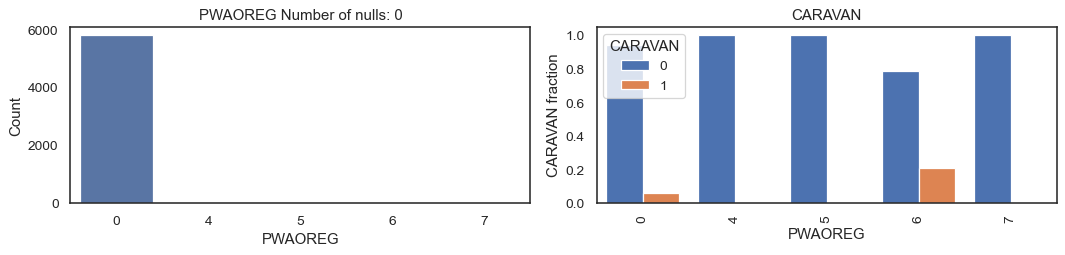

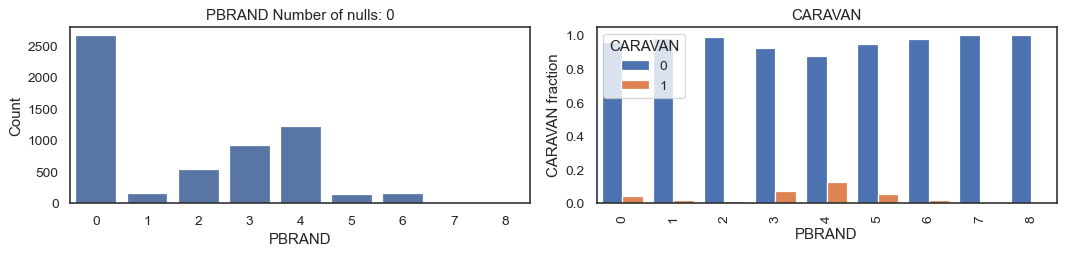

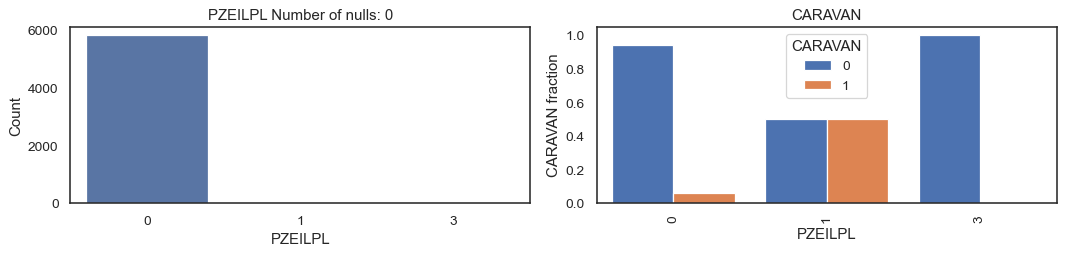

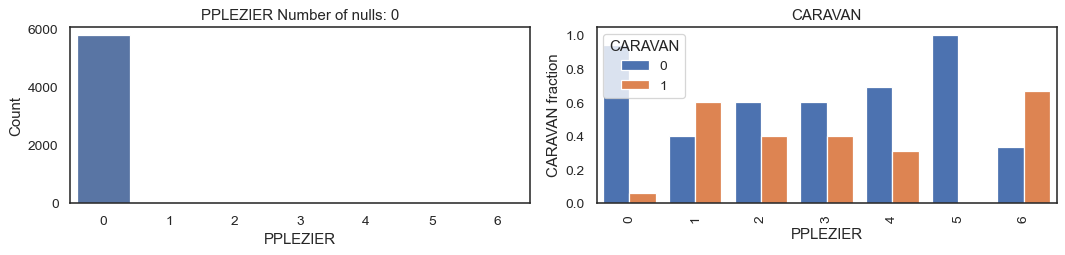

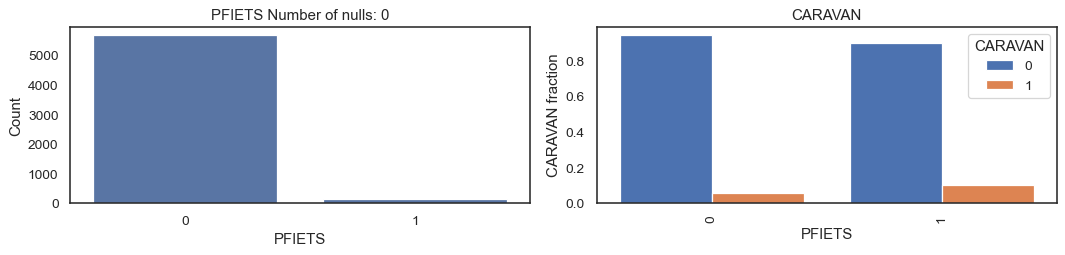

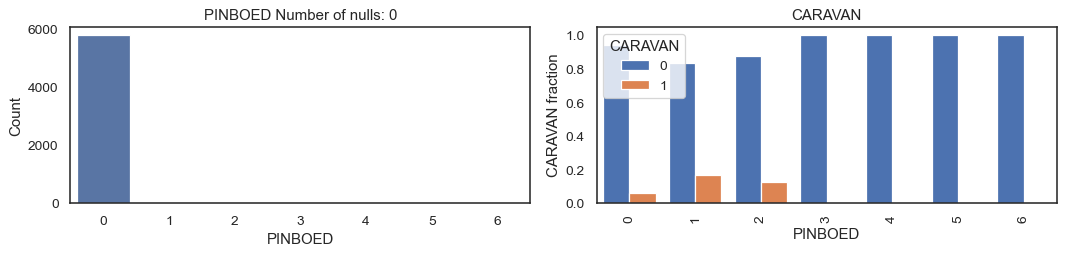

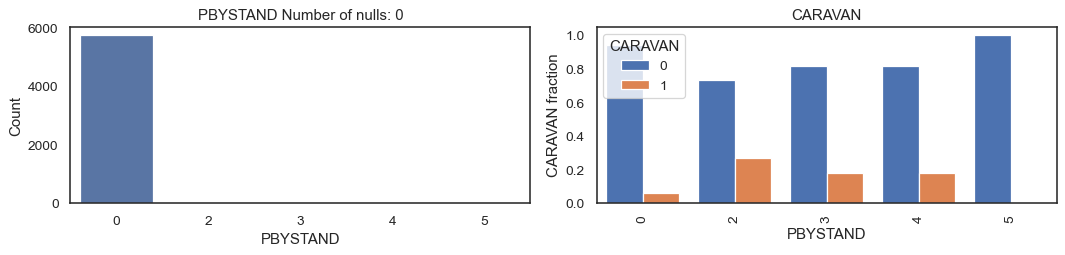

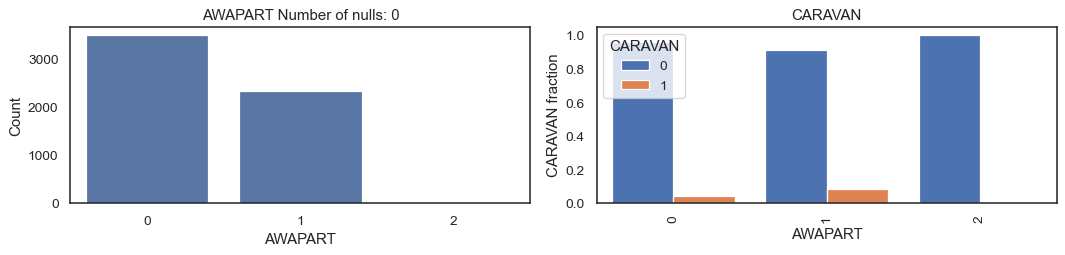

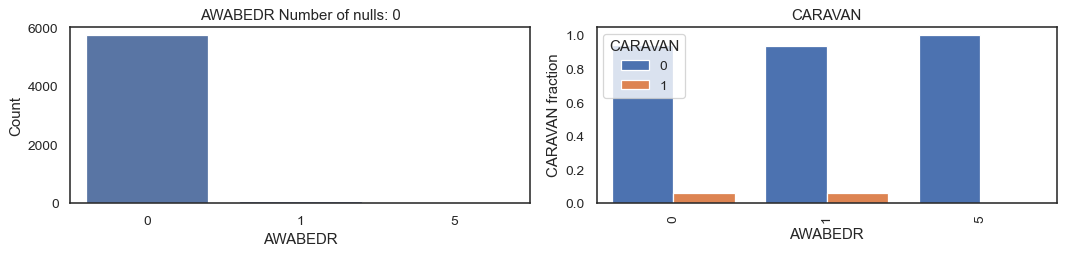

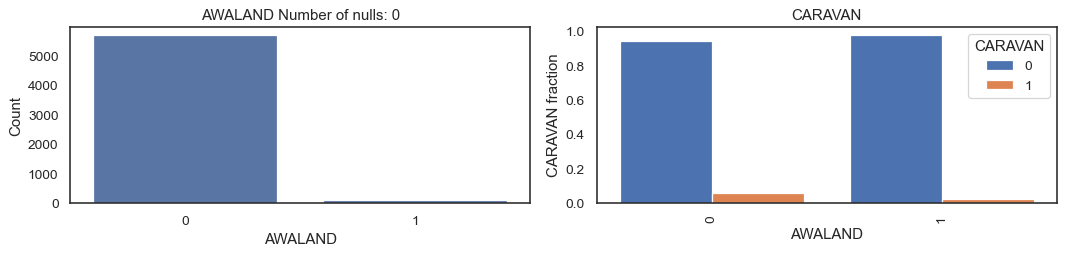

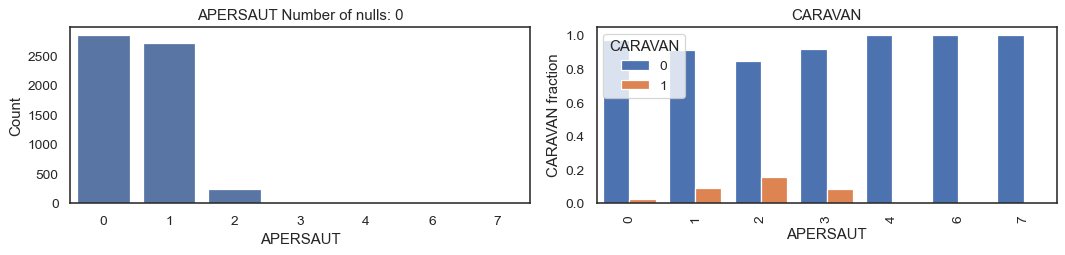

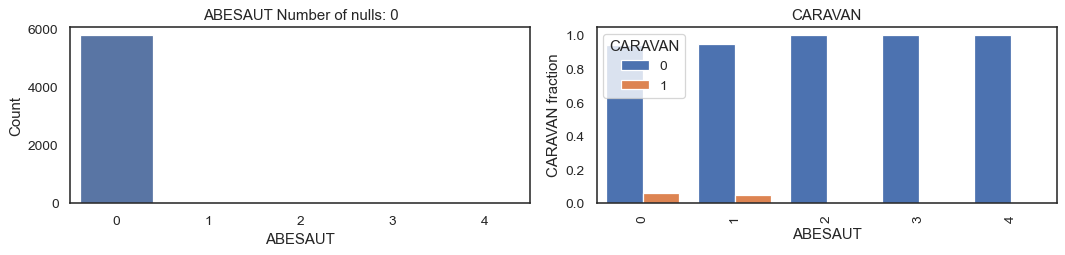

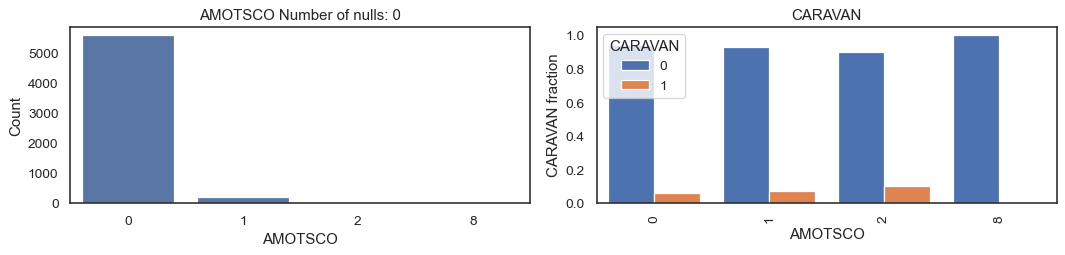

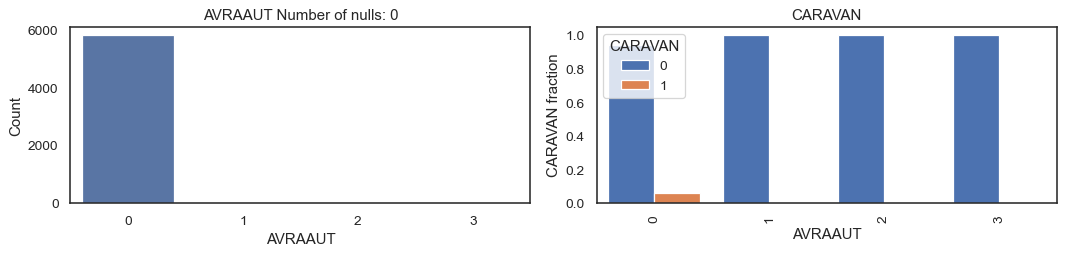

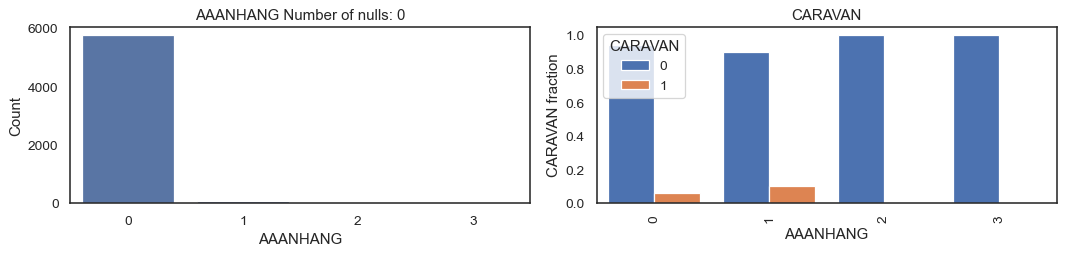

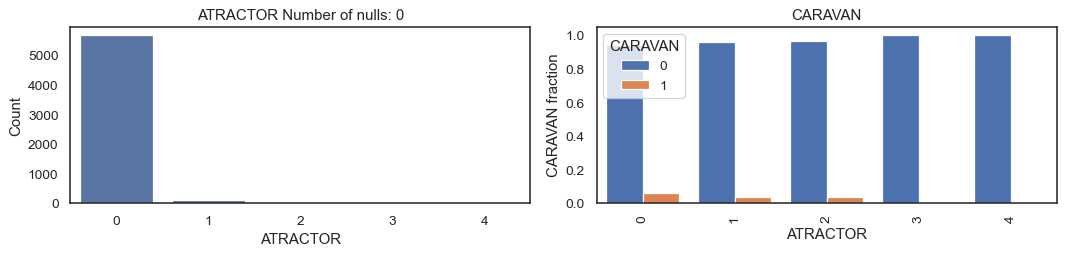

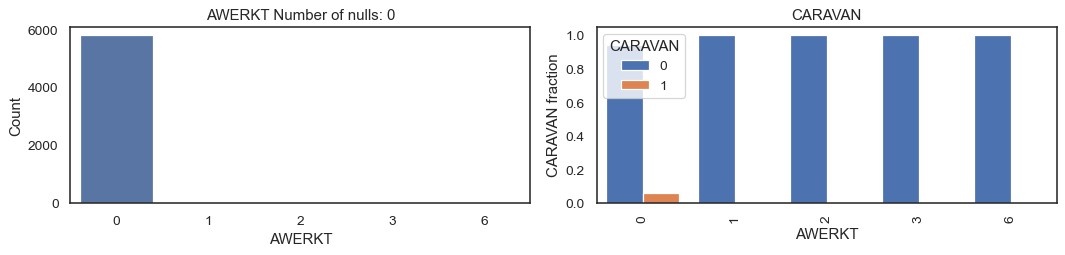

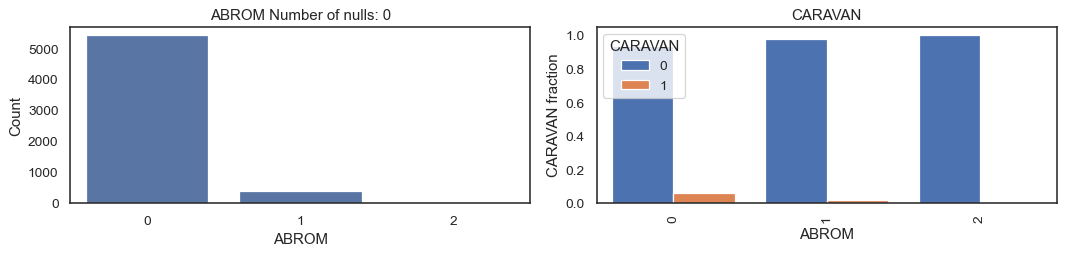

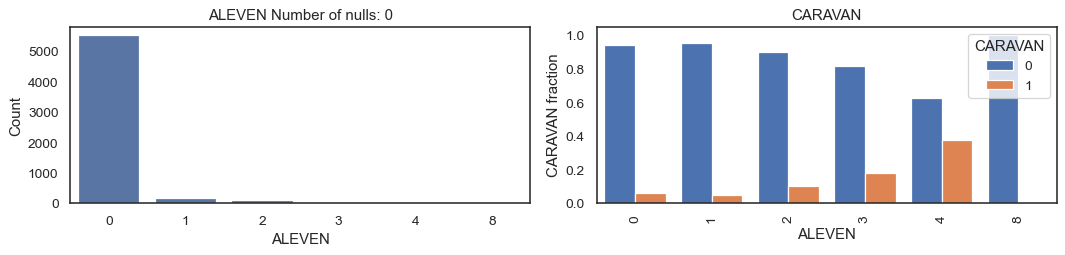

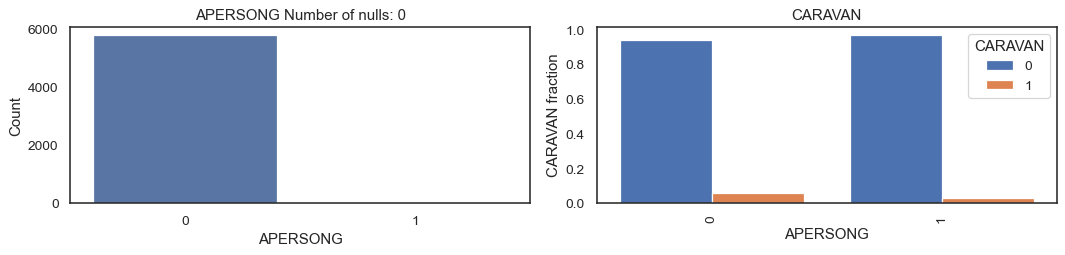

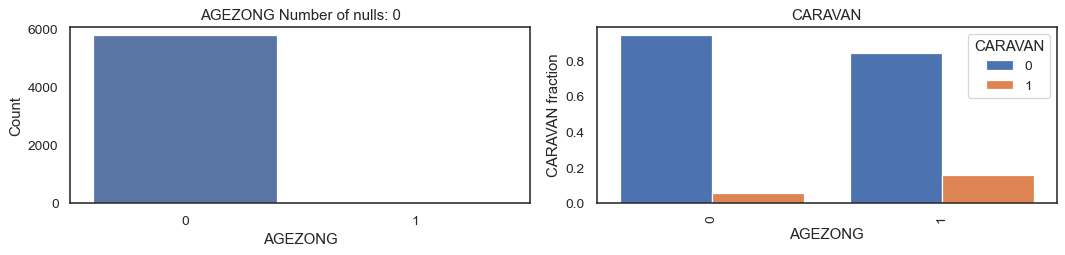

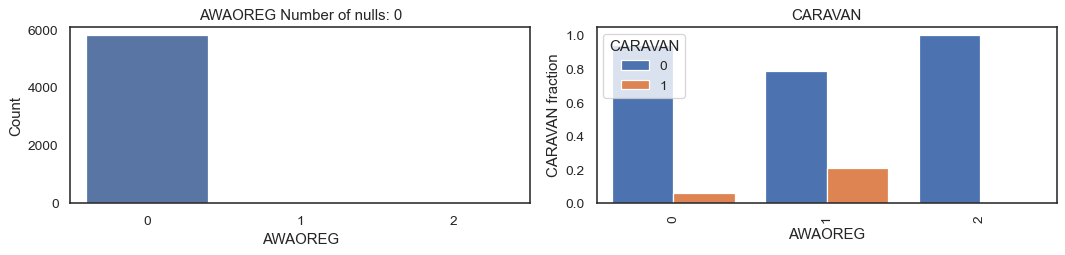

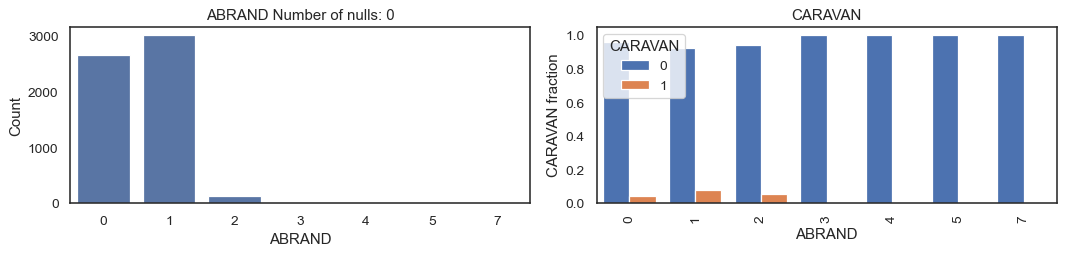

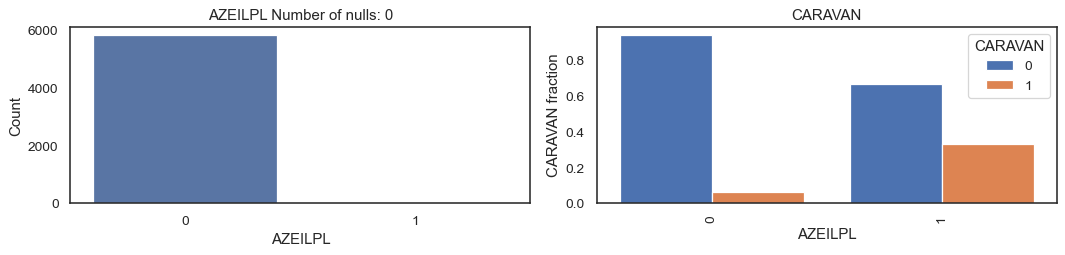

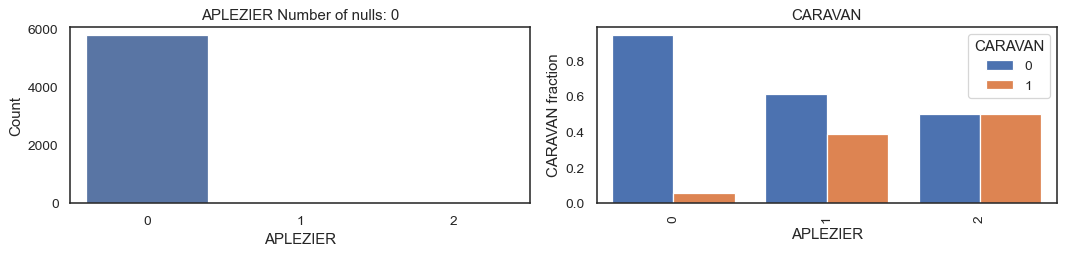

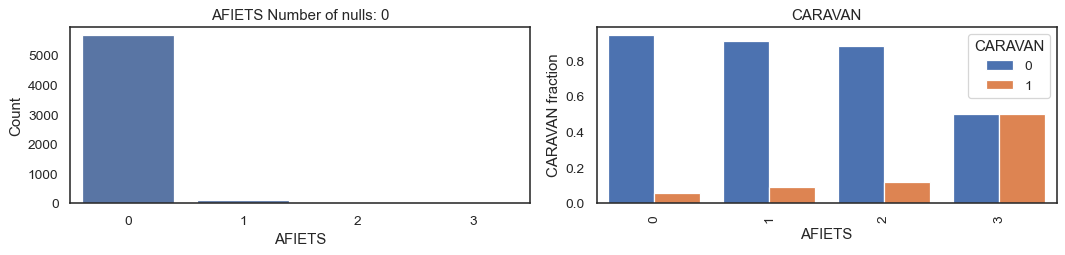

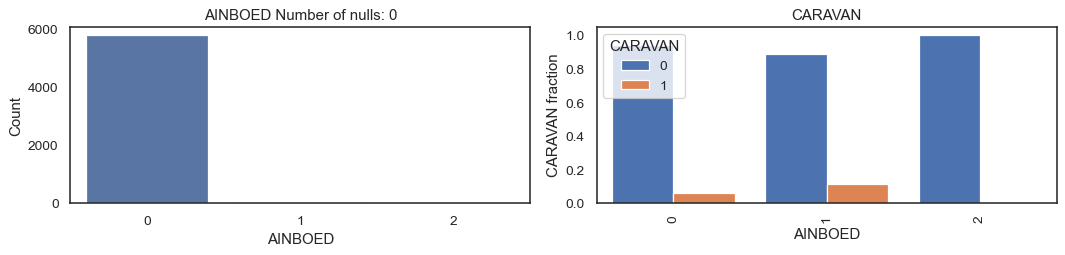

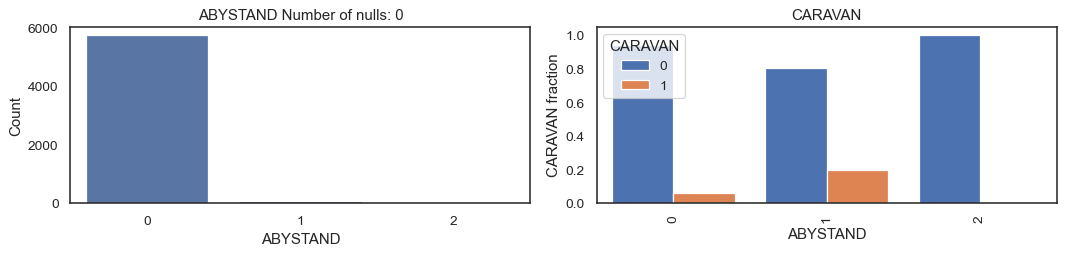

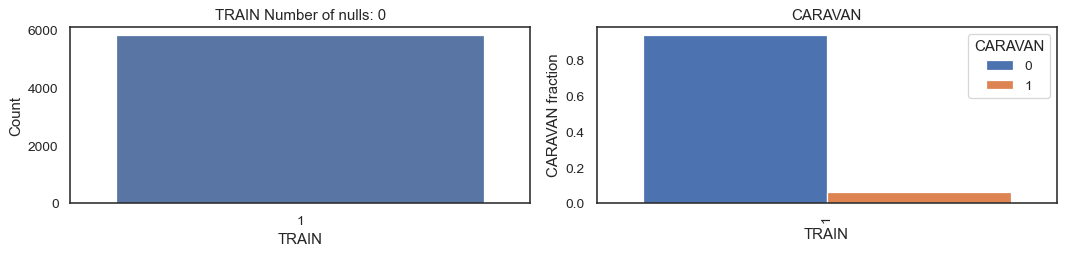

In [39]:
for i in list(df_ticdata.columns):
    if (df_ticdata[i].dtype==float) & (i!='CARAVAN'):
        plot_feature(df_ticdata, col_name=i, isContinuous=True, target='CARAVAN')
    elif  i!='CARAVAN':
        plot_feature(df_ticdata, col_name=i, isContinuous=False, target='CARAVAN')

## Conclusion: 

The most important detail of this case, there are some variables which represented the same information, with the peculiarity some are categoricals and other are numericals.